In [ ]:
#description : get one participant and then devide their trails into 50 blocks and then calculate the erp and then visualize
#if the participant has 281 trials , then there will be 40 blocks 6 blocks containing 40 trials and one containing 41 trials. It mean last block will accompany the remaining trials.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
import numpy as np
!pip install h5py


In [ ]:
import scipy.io as sio

# File path
combined_eeg_file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_Files_combined.mat'

# Load the data
combined_data = sio.loadmat(combined_eeg_file_path)

# Print all keys in the loaded file to find the correct variable name
print(combined_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'combined_data'])


In [ ]:
# Assuming the correct key is 'combined_data'
eeg_data = combined_data['combined_data']  # Extract the EEG data

# Print the shape
print(f"Shape of EEG data: {eeg_data.shape}")


Shape of EEG data: (385, 56, 10742)


In [ ]:
#block size is set to 60 after SNR calculation
import numpy as np
import scipy.io as sio

# File paths
ystim_file_path = '/content/drive/MyDrive/EEG_dataset/y_stim_subset_23161_to_33902.mat'
combined_eeg_file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_Files_combined.mat'

# Load y_stim subset
ystim_data = sio.loadmat(ystim_file_path)['y_stim_subset_23161_to_33902']
participants = ystim_data[0, :]  # Extract participant IDs

# Load combined EEG data
combined_data = sio.loadmat(combined_eeg_file_path)['combined_data']  # Shape: (385, 56, trials)

# Step 1: Calculate the number of trials per participant
unique_participants, trial_counts = np.unique(participants, return_counts=True)
participant_trial_mapping = dict(zip(unique_participants, trial_counts))

# Print participant-wise trial counts
print("Participant ID → Number of Trials")
for participant_id, count in participant_trial_mapping.items():
    print(f"Participant {participant_id}: {count} trials")

# Step 2: Process each participant's trials
start_index = 0  # Initialize trial index
for participant_id in unique_participants:
    num_trials = participant_trial_mapping[participant_id]
    participant_trials = combined_data[:, :, start_index:start_index + num_trials]  # Extract trials for participant


    # Determine block size
    block_size = 60
    num_full_blocks = num_trials // block_size  # Number of full 40-trial blocks
    remaining_trials = num_trials % block_size  # Remaining trials for the last block

    # Create ERP blocks
    trial_blocks = []
    for i in range(num_full_blocks):
        trial_blocks.append(participant_trials[:, :, i * block_size:(i + 1) * block_size])

    # Add the remaining trials as a separate block if necessary
    if remaining_trials > 0:
        trial_blocks.append(participant_trials[:, :, num_full_blocks * block_size:])

    # Compute and save ERP for each block
    for block_idx, block_trials in enumerate(trial_blocks):
        average_signal = np.mean(block_trials, axis=2)  # Average over trials
        average_signal = average_signal.T  # Shape: (channels, timepoints)

        # Save the ERP of each block
        output_path = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}_block_{block_idx + 1}.mat'
        sio.savemat(output_path, {'average_signal': average_signal})

        # Print block details for verification
        print(f"Participant {participant_id}, Block {block_idx + 1}: {block_trials.shape[2]} trials saved to {output_path}")

    # Update the start index for the next participant
    start_index += num_trials


Participant ID → Number of Trials
Participant 1.0: 257 trials
Participant 2.0: 279 trials
Participant 3.0: 46 trials
Participant 4.0: 259 trials
Participant 5.0: 205 trials
Participant 6.0: 262 trials
Participant 7.0: 214 trials
Participant 8.0: 262 trials
Participant 9.0: 261 trials
Participant 10.0: 265 trials
Participant 11.0: 285 trials
Participant 12.0: 255 trials
Participant 13.0: 213 trials
Participant 14.0: 238 trials
Participant 15.0: 168 trials
Participant 16.0: 125 trials
Participant 17.0: 239 trials
Participant 18.0: 195 trials
Participant 19.0: 286 trials
Participant 20.0: 197 trials
Participant 21.0: 234 trials
Participant 22.0: 203 trials
Participant 23.0: 223 trials
Participant 24.0: 265 trials
Participant 25.0: 255 trials
Participant 26.0: 226 trials
Participant 27.0: 264 trials
Participant 28.0: 259 trials
Participant 29.0: 260 trials
Participant 30.0: 290 trials
Participant 31.0: 287 trials
Participant 32.0: 229 trials
Participant 33.0: 172 trials
Participant 34.0: 2

In [ ]:
import scipy.io as sio

# Path to the filtered .mat file
filtered_mat_file = '/content/drive/MyDrive/EEG_dataset/filtered_channel_file.mat'  # Change to your actual file path

# Load the .mat file
mat_data = sio.loadmat(filtered_mat_file)

# Print all variable names (keys) inside the .mat file
print("Keys in the .mat file:", mat_data.keys())

# Inspect the shape and content of each variable
for key in mat_data:
    if not key.startswith('__'):  # Ignore metadata keys
        data = mat_data[key]
        print(f"\nVariable: {key}")
        print(f"Shape: {data.shape}")
        print(f"Contents:\n{data}")


Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'filtered_channel_data'])

Variable: filtered_channel_data
Shape: (1, 56)
Contents:
[[(array(['Cz'], dtype='<U2'), array(['µV/m²'], dtype='<U5'), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[90]], dtype=uint8), array([[-0.]]), array([[0]], dtype=uint8), array([[6.123234e-17]]), array([[0]], dtype=uint8), array([[1]], dtype=uint8), array([], dtype='<U1'), array([], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))
  (array(['FCz'], dtype='<U3'), array(['µV/m²'], dtype='<U5'), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[67]], dtype=uint8), array([[-0.]]), array([[0.12777778]]), array([[0.39073113]]), array([[0]], dtype=uint8), array([[0.92050485]]), array([], dtype='<U1'), array([], dtype='<U1'), array([], shape=(1, 0), dtype=float64))
  (array(['FC1'], dtype='<U3'), array(['µV/m²'], dtype='<U5'), array([[1]], dtype=uint8), array([[60]], dtype=uint8), array([[67]], dtype=uin

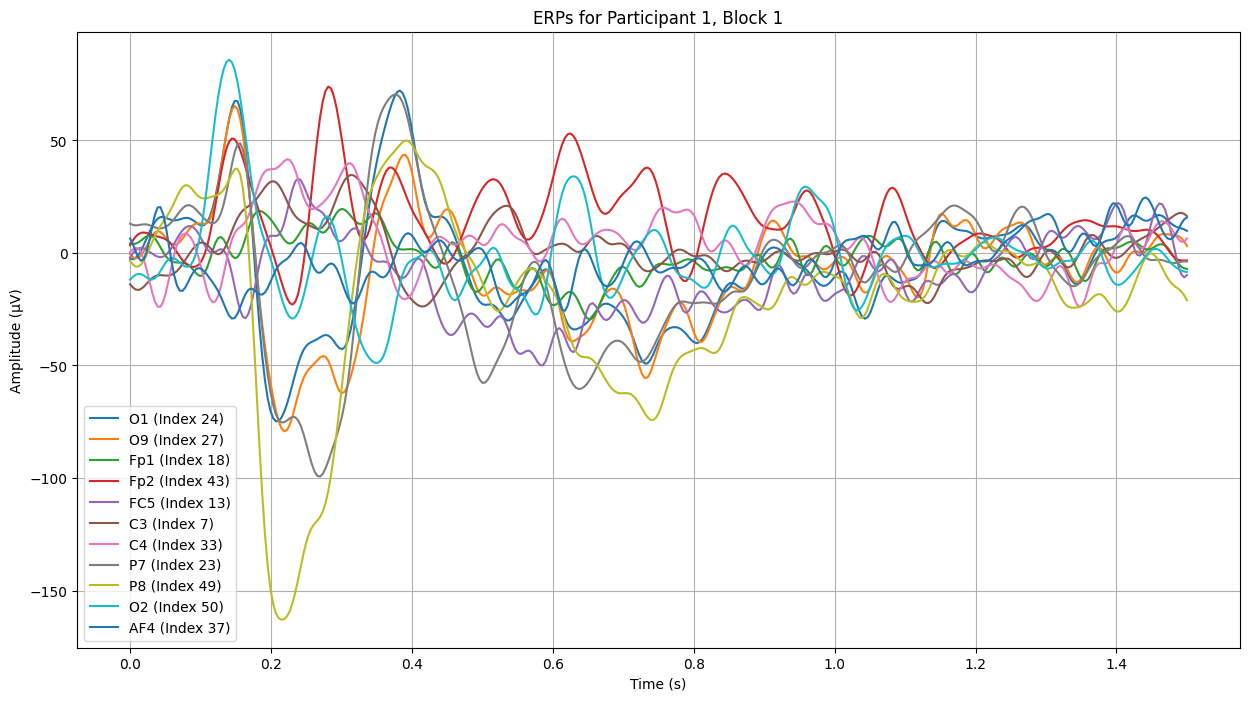

In [ ]:
# Channel name → 0-based index (directly from your data)
channel_map = {
    "O1": 24,
    "O9": 27,
    "Fp1": 18,
    "Fp2": 43,
    "FC5": 13,  # From your data dump: FC5 is at index 13
    "C3": 7,
    "C4": 33,   # From your data dump: C4 is at index 33
    "P7": 23,
    "P8": 49,   # From your data dump: P8 is at index 49
    "O2": 50,   # From your data dump: O2 is at index 50
    "AF4": 37   # From your data dump: AF4 is at index 37
}
import matplotlib.pyplot as plt
import numpy as np

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

def plot_erps(participant_id, block_id):
    # Load ERP data
    erp_file = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}.0_block_{block_id}.mat'
    erp_data = sio.loadmat(erp_file)
    average_signal = erp_data['average_signal']  # Shape: (56, 385)

    # Plot settings
    plt.figure(figsize=(15, 8))
    for ch_name, ch_idx in channel_map.items():
        plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_erps(participant_id=1, block_id=1)

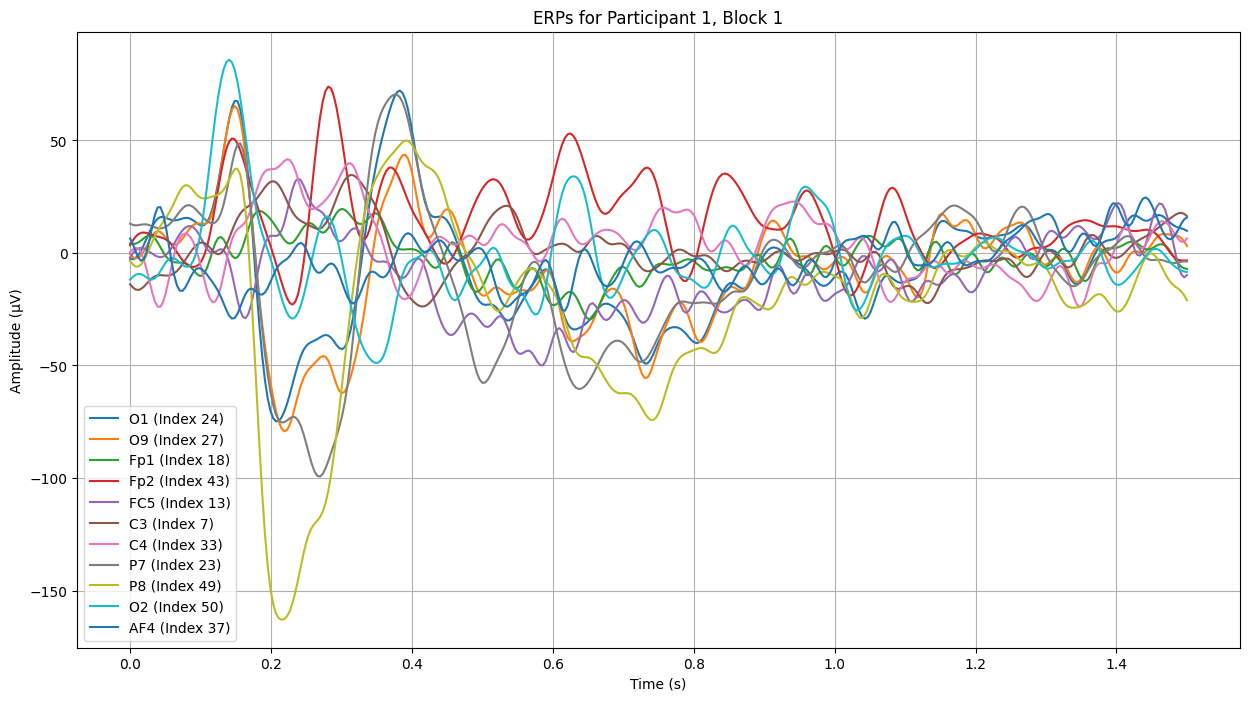

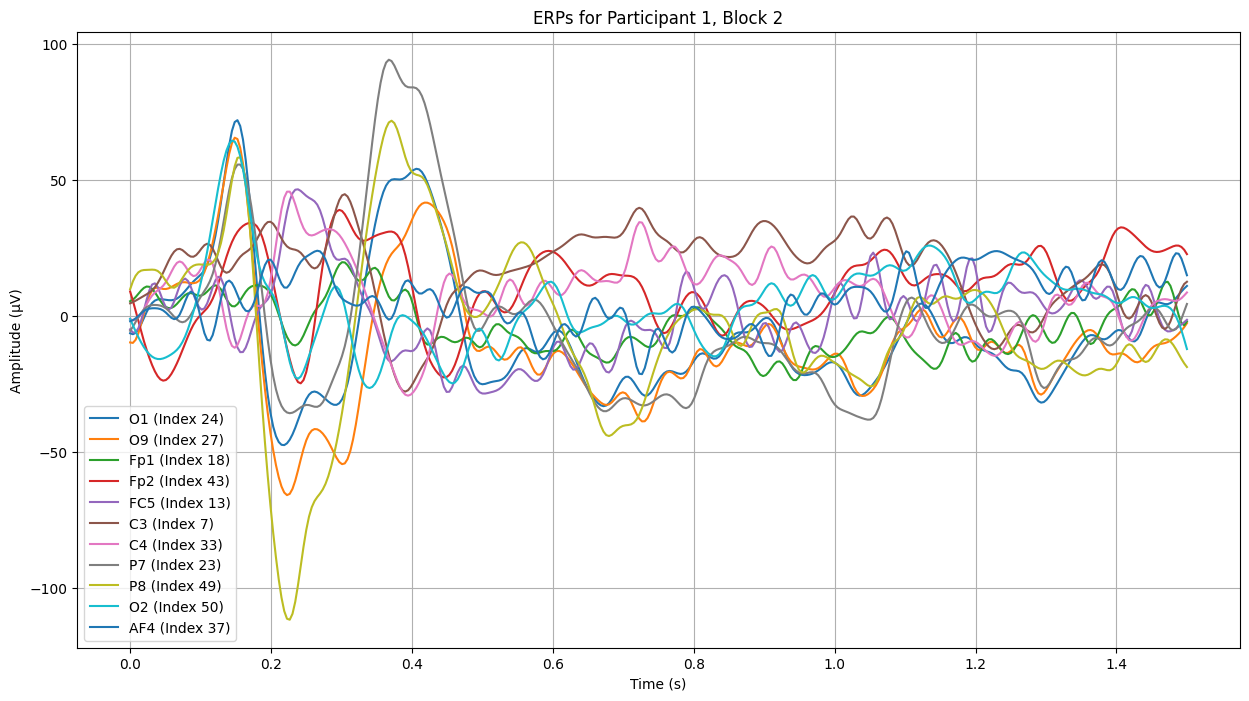

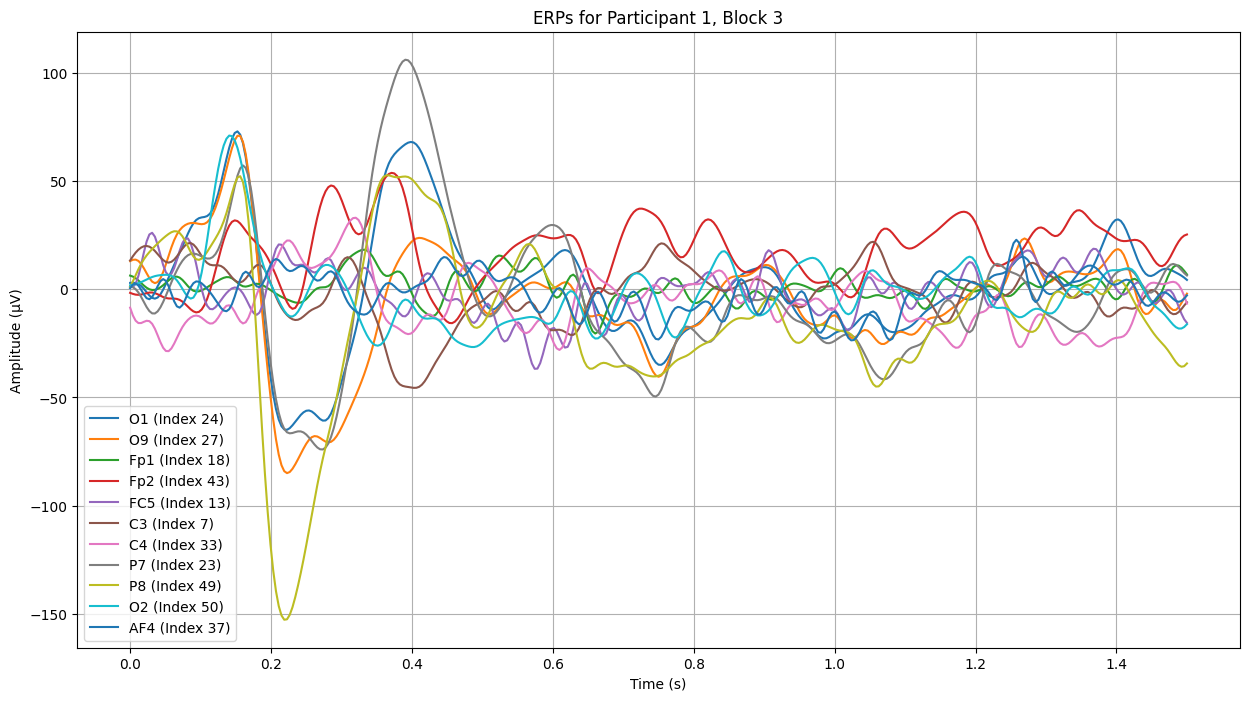

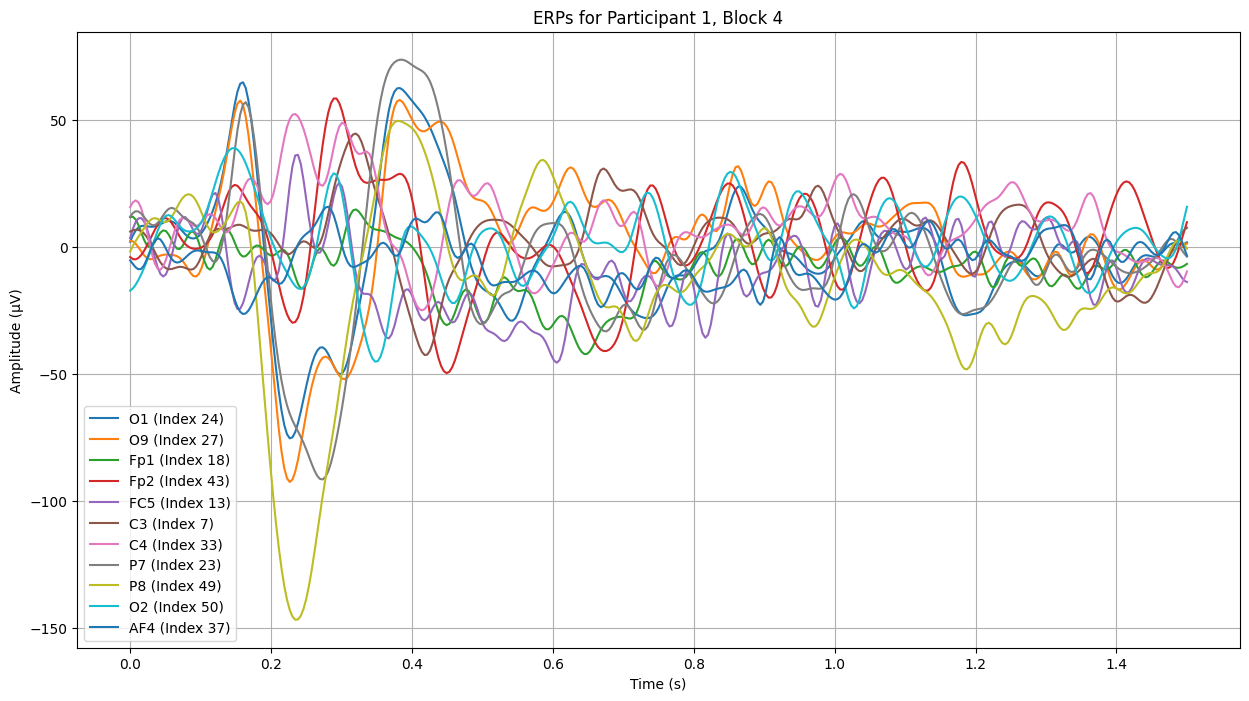

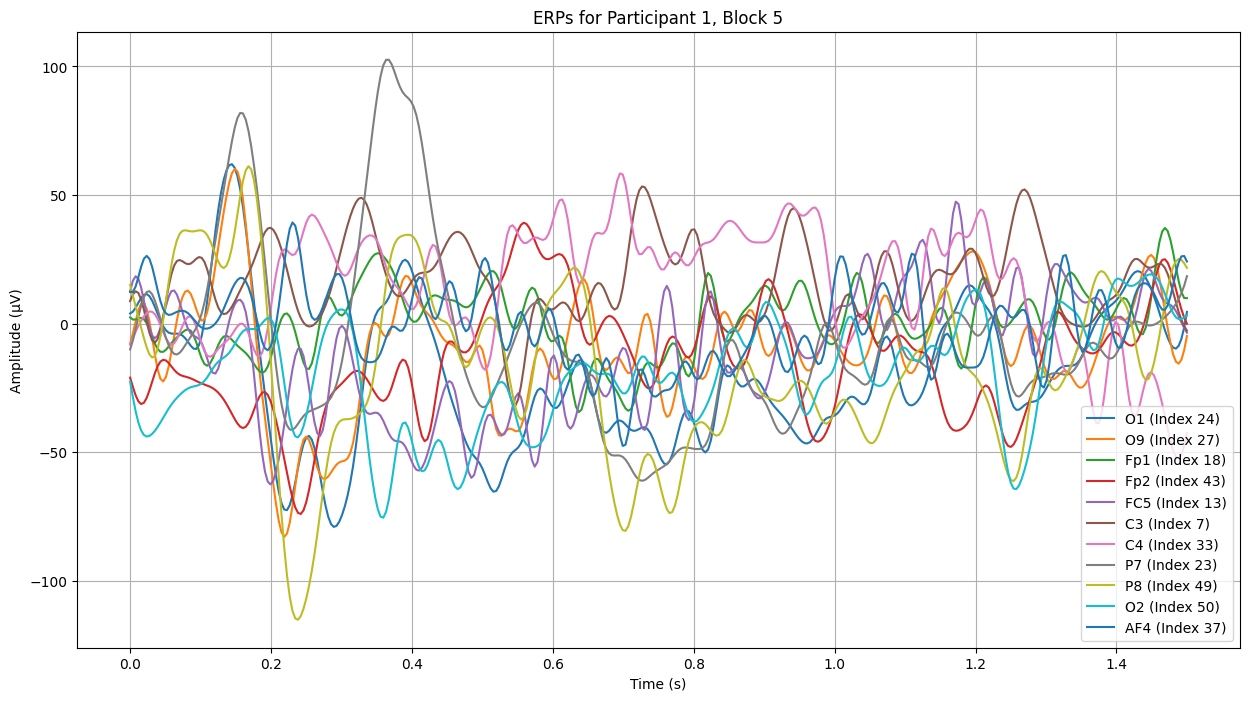

In [ ]:
#ERPs for participant in all blocks
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import os
import glob

# Define the participant ID
participant_id = 1
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# Channel name → 0-based index
channel_map = {
    "O1": 24, "O9": 27, "Fp1": 18, "Fp2": 43, "FC5": 13,
    "C3": 7, "C4": 33, "P7": 23, "P8": 49, "O2": 50, "AF4": 37
}

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals
def plot_erps_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Plot settings
        plt.figure(figsize=(15, 8))
        for ch_name, ch_idx in channel_map.items():
            plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot all ERP blocks for the participant
plot_erps_for_participant(erp_files, participant_id)


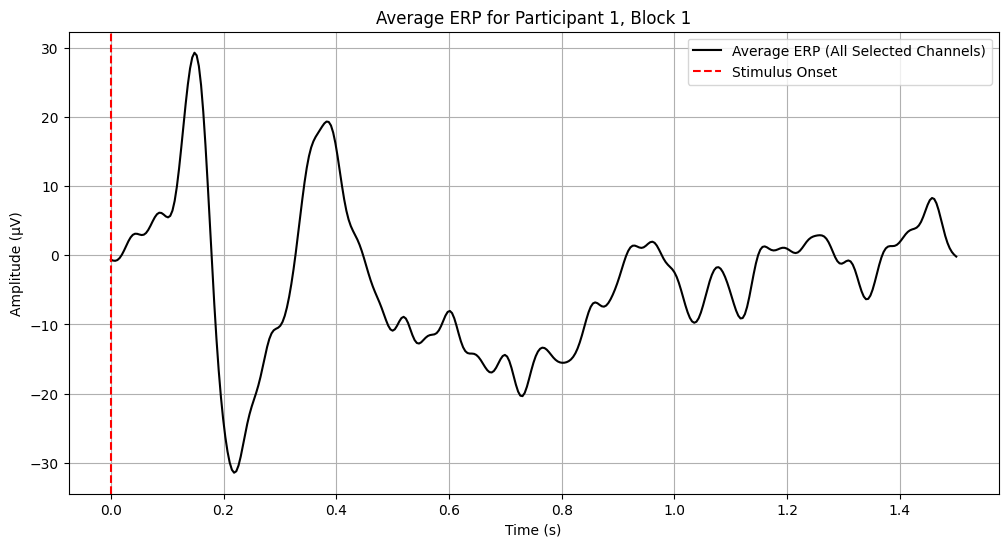

In [ ]:
#Average ERP for Participant 1, Block 1 ->average across channels
def plot_average_erp(participant_id, block_id):
    # Load ERP data
    erp_file = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}.0_block_{block_id}.mat'
    erp_data = sio.loadmat(erp_file)
    average_signal = erp_data['average_signal']  # Shape: (56, 385)

    # Compute the average ERP across selected channels
    selected_indices = list(channel_map.values())  # Get indices of selected channels
    average_erp = np.mean(average_signal[selected_indices, :], axis=0)  # Compute mean across channels

    # Plot settings
    plt.figure(figsize=(12, 6))
    plt.plot(time, average_erp, label=f'Average ERP (All Selected Channels)', color='black')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'Average ERP for Participant {participant_id}, Block {block_id}')
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')  # Mark stimulus onset
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_average_erp(participant_id=1, block_id=1)


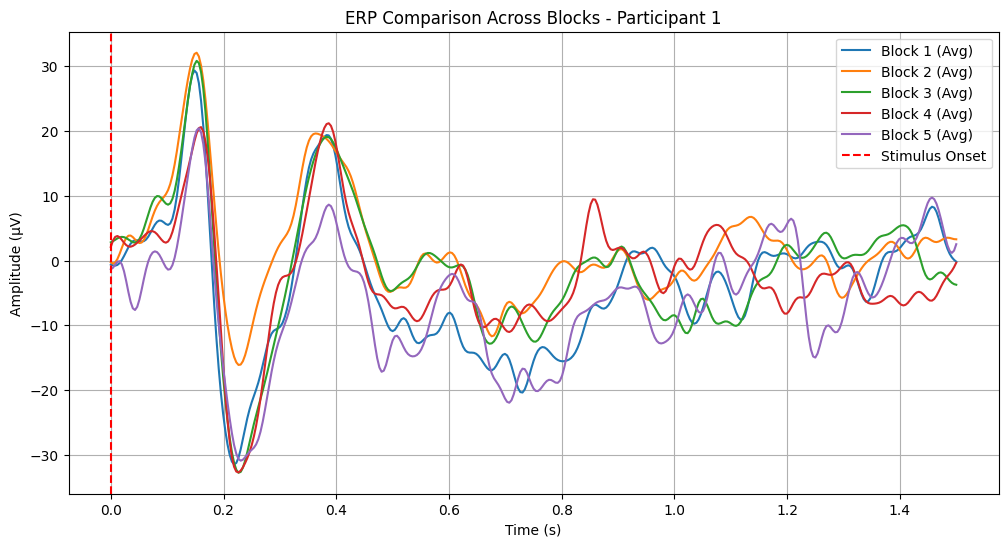

In [ ]:
#ERP Comparison Across Blocks - Participant -averaging across channels
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID and ERP directory
participant_id = 1
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# Channel name → 0-based index
channel_map = {
    "O1": 24, "O9": 27, "Fp1": 18, "Fp2": 43, "FC5": 13,
    "C3": 7, "C4": 33, "P7": 23, "P8": 49, "O2": 50, "AF4": 37
}

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot all ERP blocks for a participant
def plot_all_erps(erp_files, participant_id, average_channels=False):
    plt.figure(figsize=(12, 6))  # Create a single figure for all blocks

    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        if average_channels:
            # Compute the average ERP across selected channels
            selected_indices = list(channel_map.values())
            erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)  # Average across channels
            label = f'Block {block_id} (Avg)'
        else:
            # Use a single representative channel (e.g., Pz if available, or O1 as an example)
            representative_channel = "O1"  # Change this to a central electrode if needed
            ch_idx = channel_map[representative_channel]
            erp_waveform = average_signal[ch_idx, :]
            label = f'Block {block_id} ({representative_channel})'

        # Plot ERP for this block
        plt.plot(time, erp_waveform, label=label)

    # Plot settings
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERP Comparison Across Blocks - Participant {participant_id}')
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')  # Mark stimulus onset
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot ERP across all blocks
plot_all_erps(erp_files, participant_id, average_channels=True)  # Set to False if you want individual channel plots


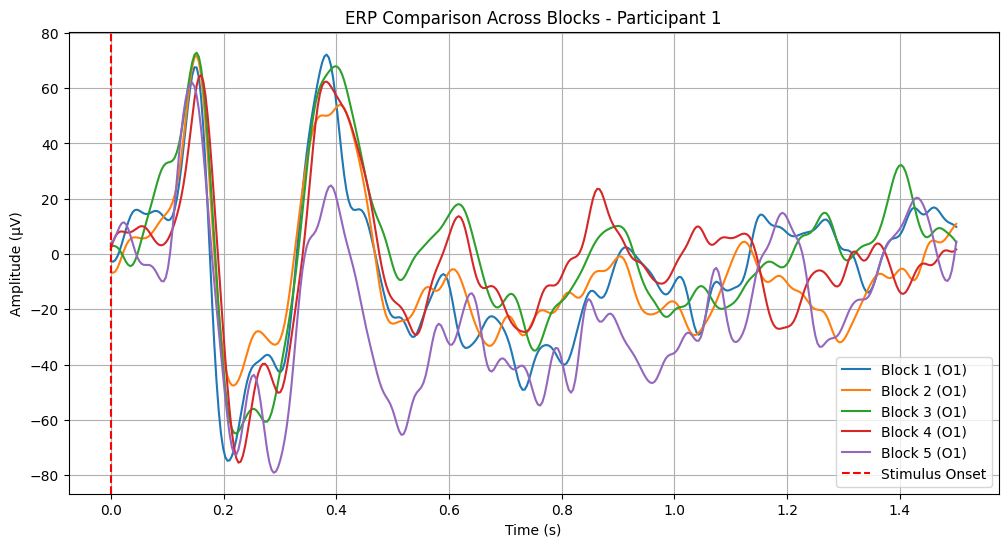

In [ ]:
#ERP Comparison Across Blocks - Participant -1 for O1 channel
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID and ERP directory
participant_id = 1
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# Channel name → 0-based index
channel_map = {
    "O1": 24, "O9": 27, "Fp1": 18, "Fp2": 43, "FC5": 13,
    "C3": 7, "C4": 33, "P7": 23, "P8": 49, "O2": 50, "AF4": 37
}

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot all ERP blocks for a participant
def plot_all_erps(erp_files, participant_id, average_channels=False):
    plt.figure(figsize=(12, 6))  # Create a single figure for all blocks

    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        if average_channels:
            # Compute the average ERP across selected channels
            selected_indices = list(channel_map.values())
            erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)  # Average across channels
            label = f'Block {block_id} (Avg)'
        else:
            # Use a single representative channel (e.g., Pz if available, or O1 as an example)
            representative_channel = "O1"  # Change this to a central electrode if needed
            ch_idx = channel_map[representative_channel]
            erp_waveform = average_signal[ch_idx, :]
            label = f'Block {block_id} ({representative_channel})'

        # Plot ERP for this block
        plt.plot(time, erp_waveform, label=label)

    # Plot settings
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERP Comparison Across Blocks - Participant {participant_id}')
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')  # Mark stimulus onset
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot ERP across all blocks
plot_all_erps(erp_files, participant_id, average_channels=False)  # Set to False if you want individual channel plots


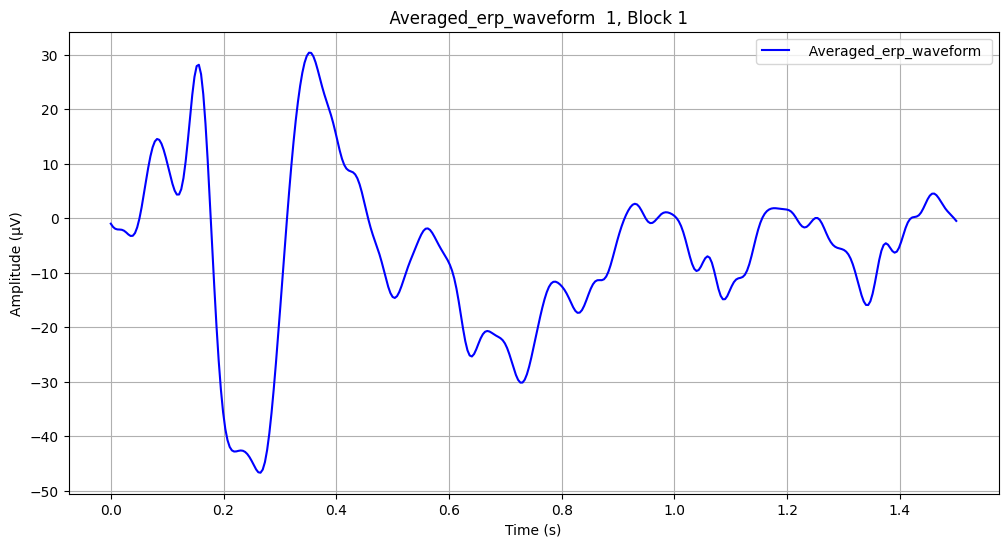

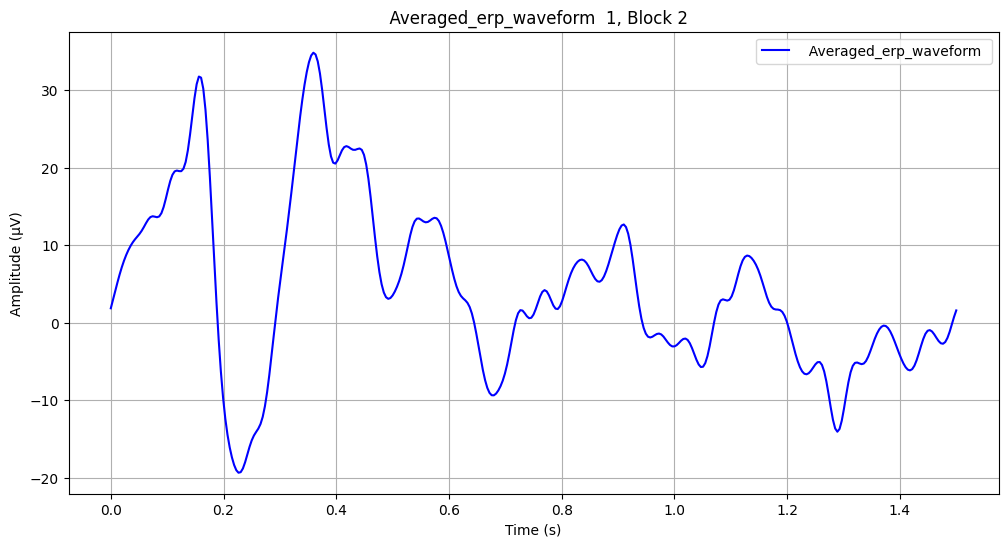

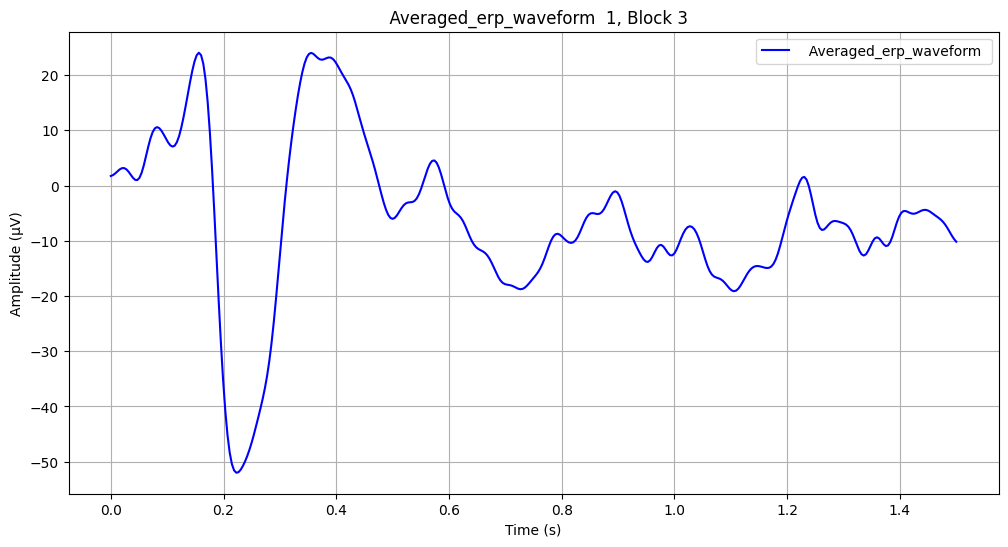

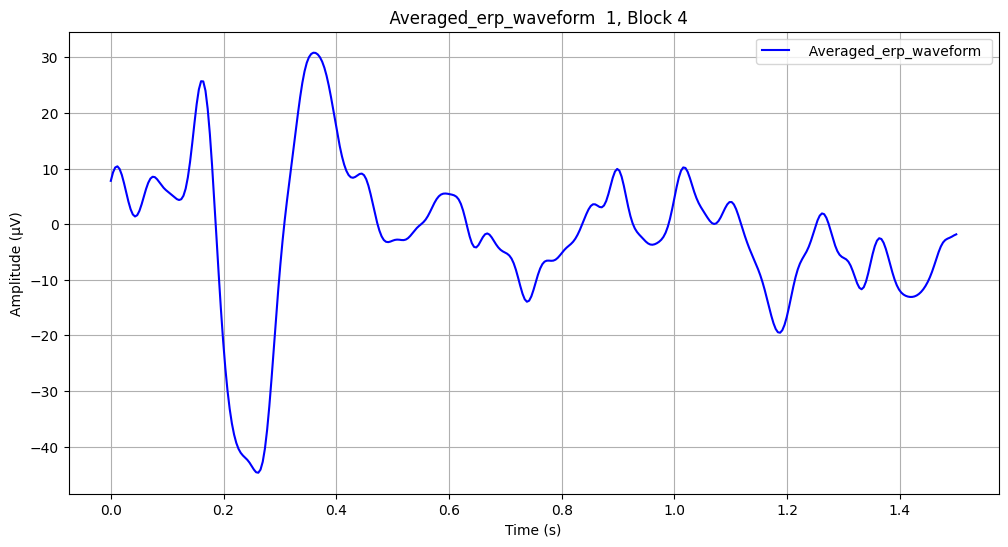

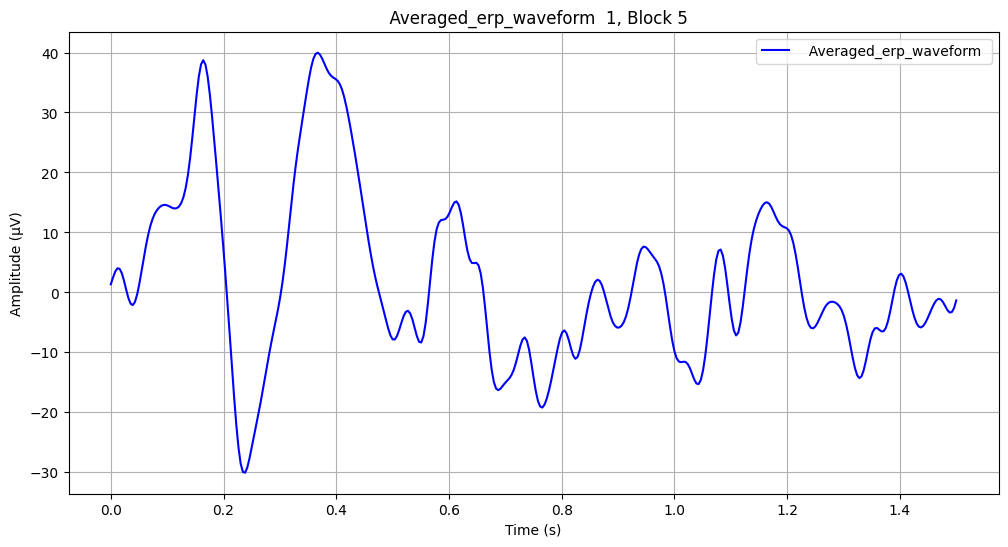

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID
participant_id = 1
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# P300-relevant channels → 0-based indices
channel_map = {
    "P7": 23, "P8": 49, "C3": 7, "C4": 33
}
selected_channels = list(channel_map.keys())  # ["P7", "P8", "C3", "C4"]
selected_indices = list(channel_map.values())  # [23, 49, 7, 33]

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals for selected channels
def plot_p300_erps_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Compute the average ERP across selected channels
        Averaged_erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)

        # Plot the averaged ERP signal
        plt.figure(figsize=(12, 6))
        plt.plot(time,   Averaged_erp_waveform , label="  Averaged_erp_waveform ", color='b')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'  Averaged_erp_waveform  {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot P300 ERPs for all blocks
plot_p300_erps_for_participant(erp_files, participant_id)


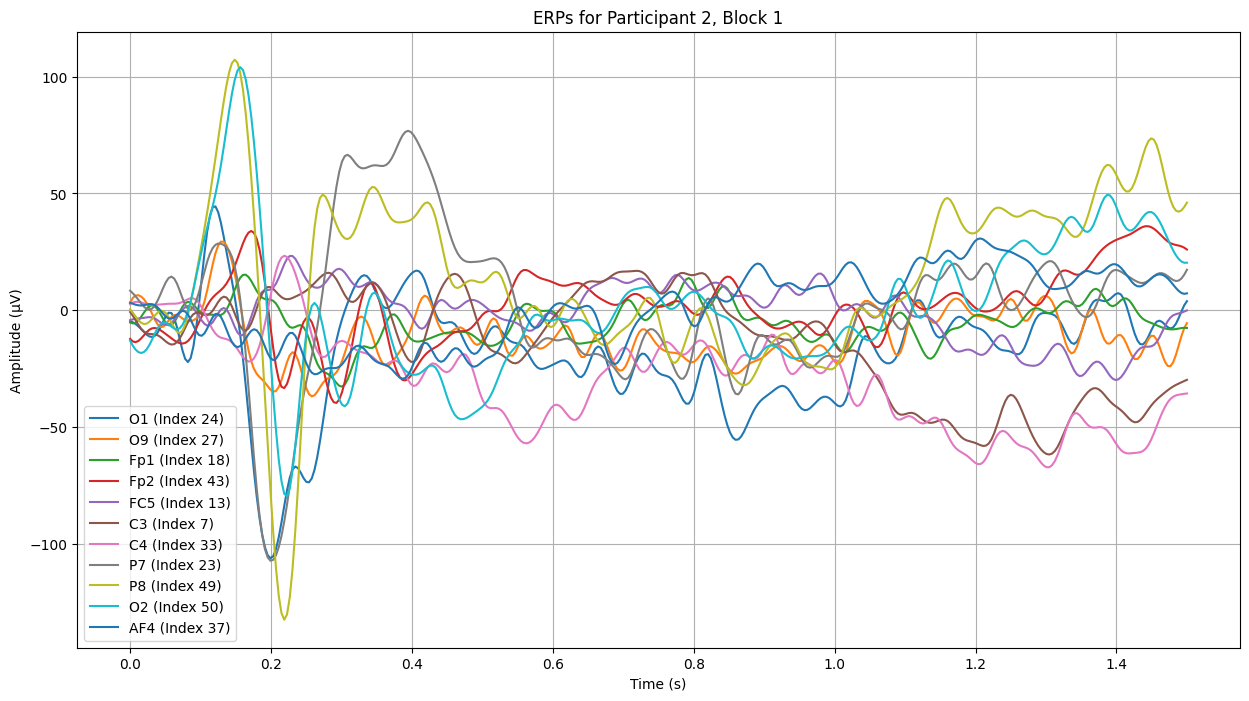

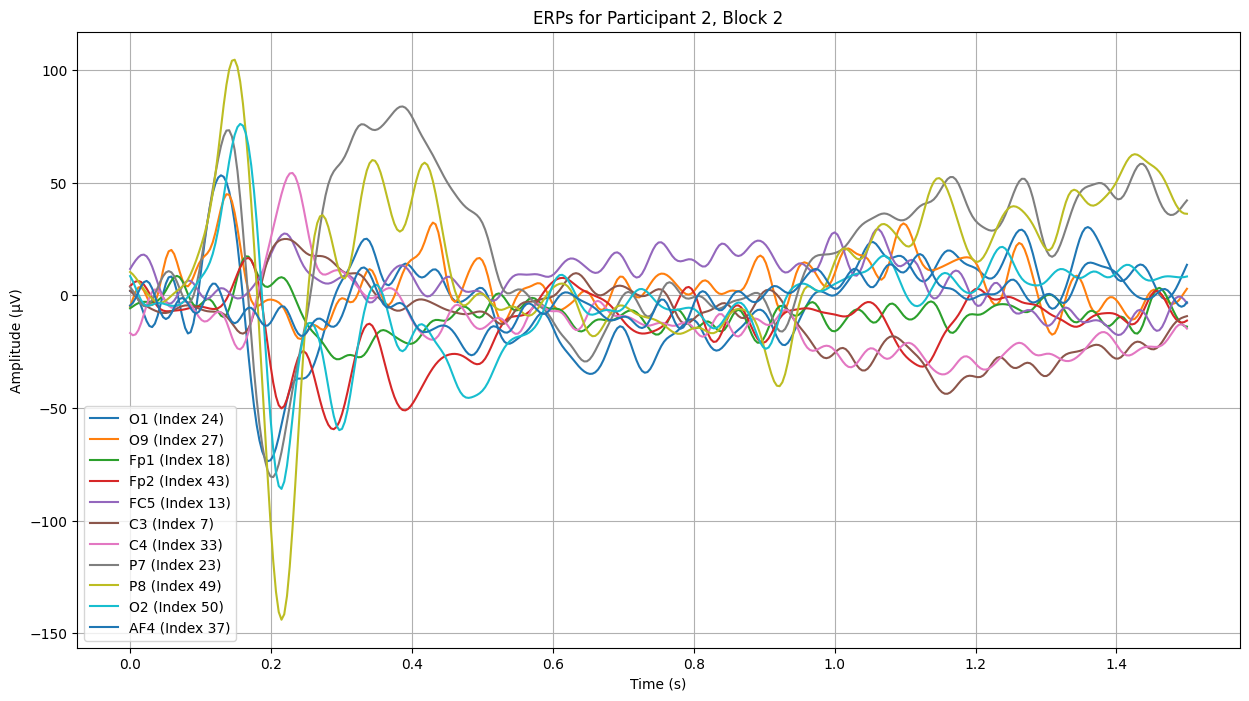

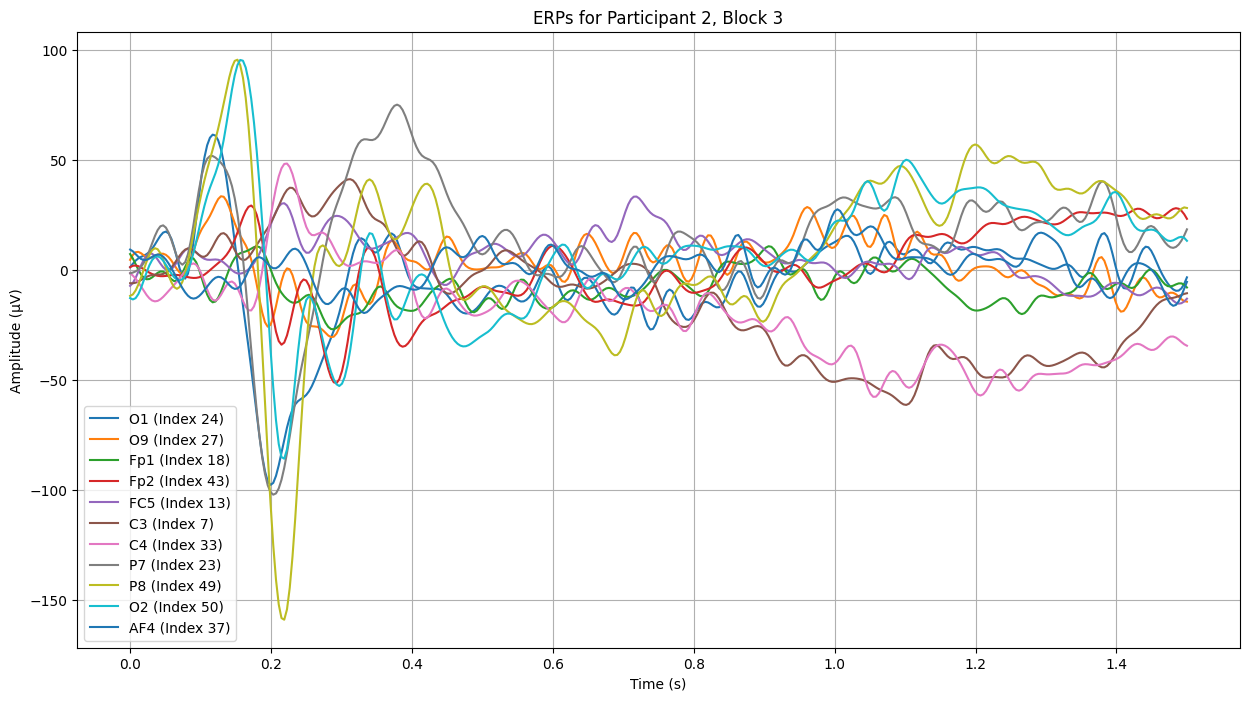

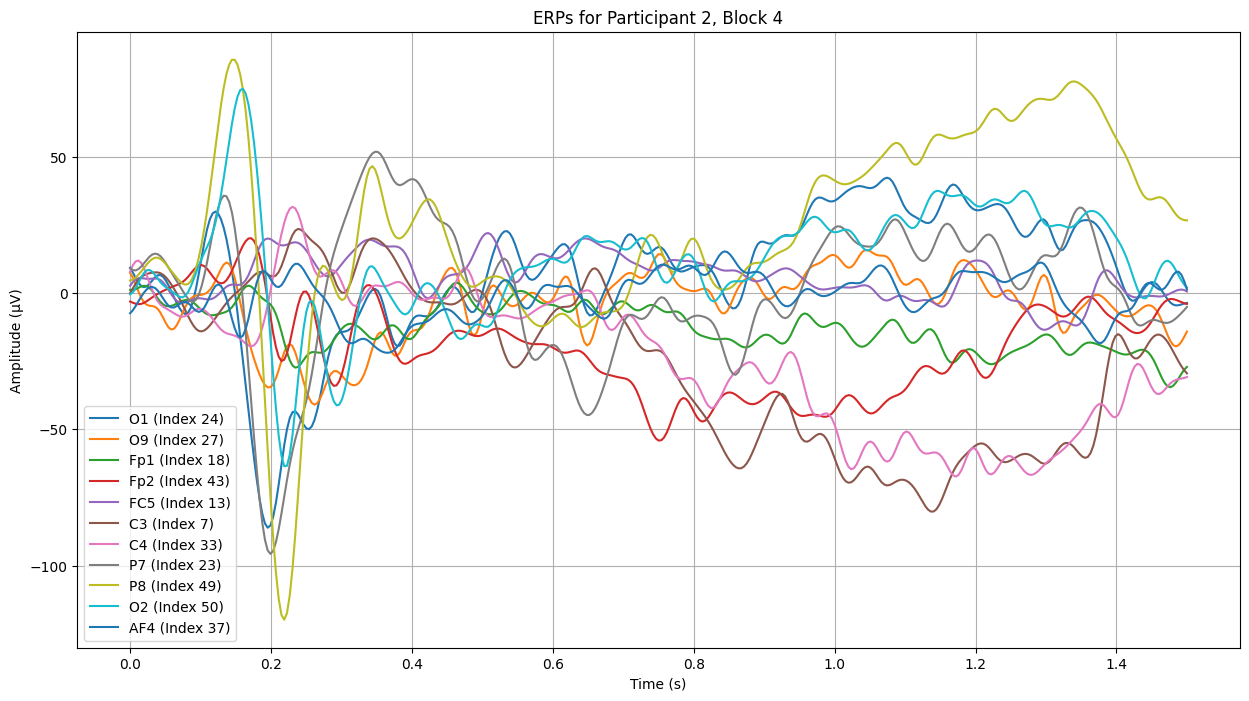

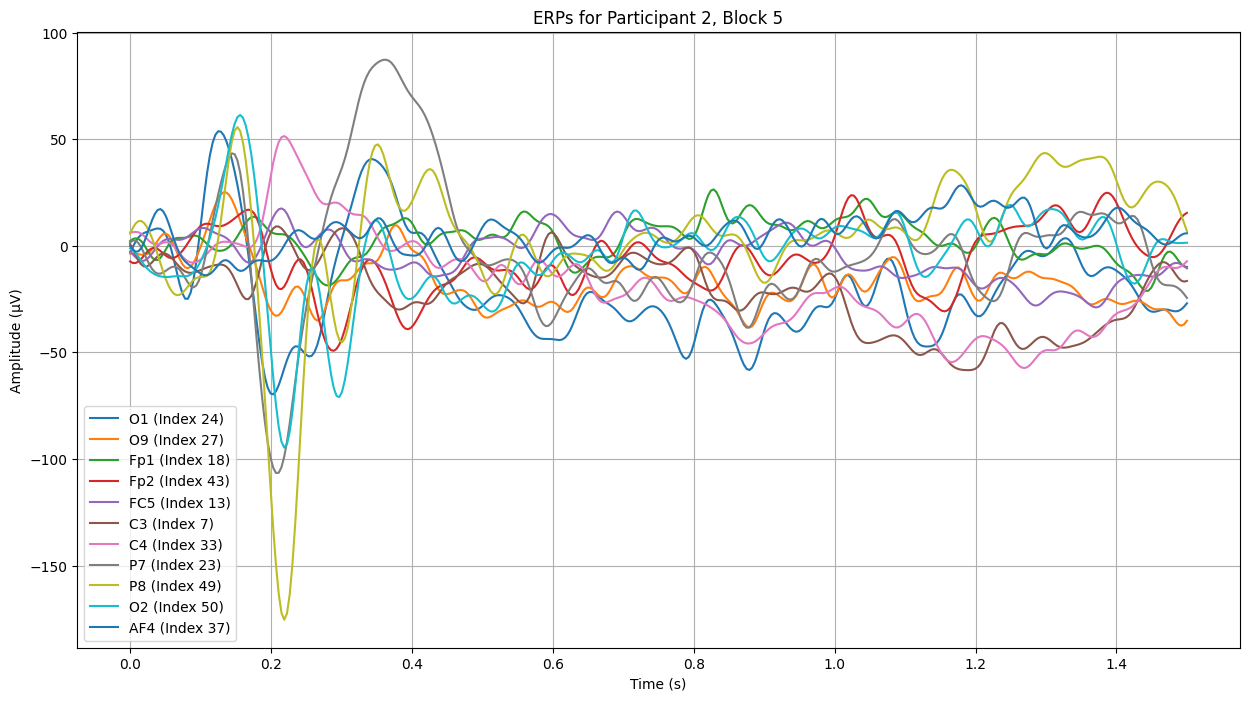

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import os
import glob

# Define the participant ID
participant_id = 2
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# Channel name → 0-based index
channel_map = {
    "O1": 24, "O9": 27, "Fp1": 18, "Fp2": 43, "FC5": 13,
    "C3": 7, "C4": 33, "P7": 23, "P8": 49, "O2": 50, "AF4": 37
}

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals
def plot_erps_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Plot settings
        plt.figure(figsize=(15, 8))
        for ch_name, ch_idx in channel_map.items():
            plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot all ERP blocks for the participant
plot_erps_for_participant(erp_files, participant_id)


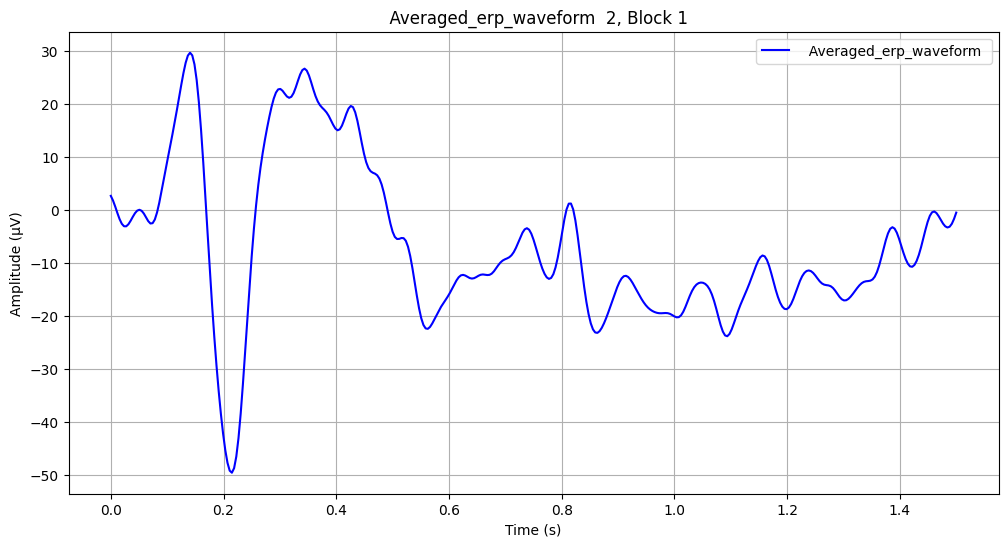

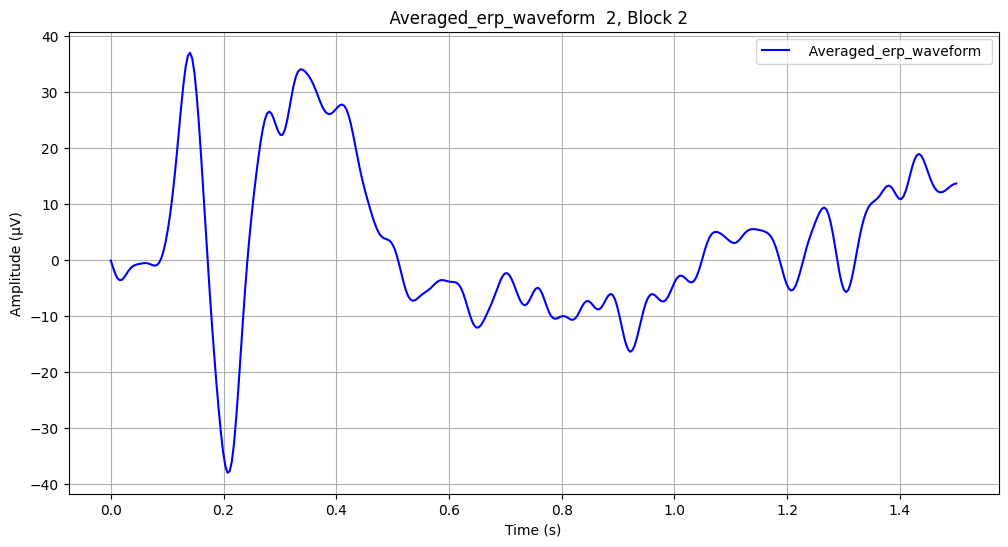

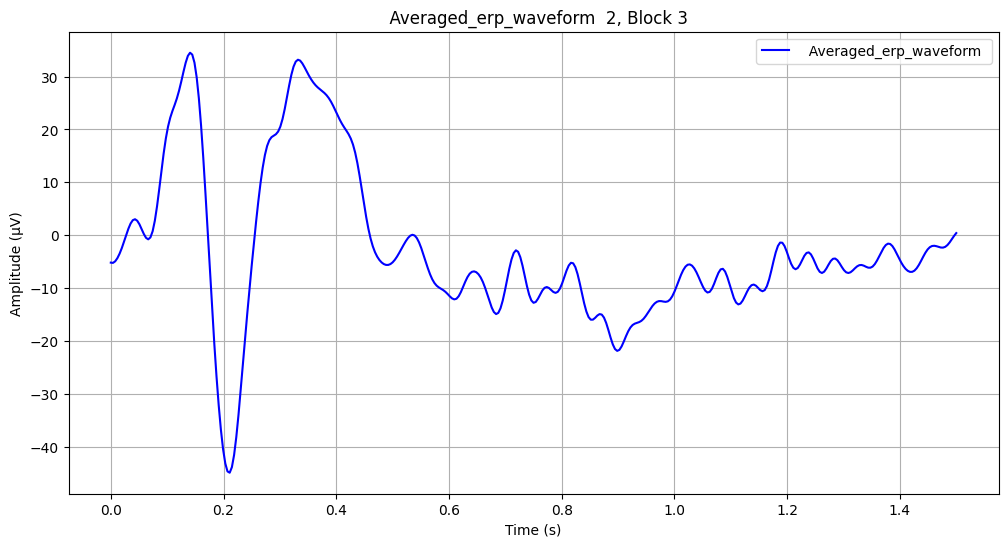

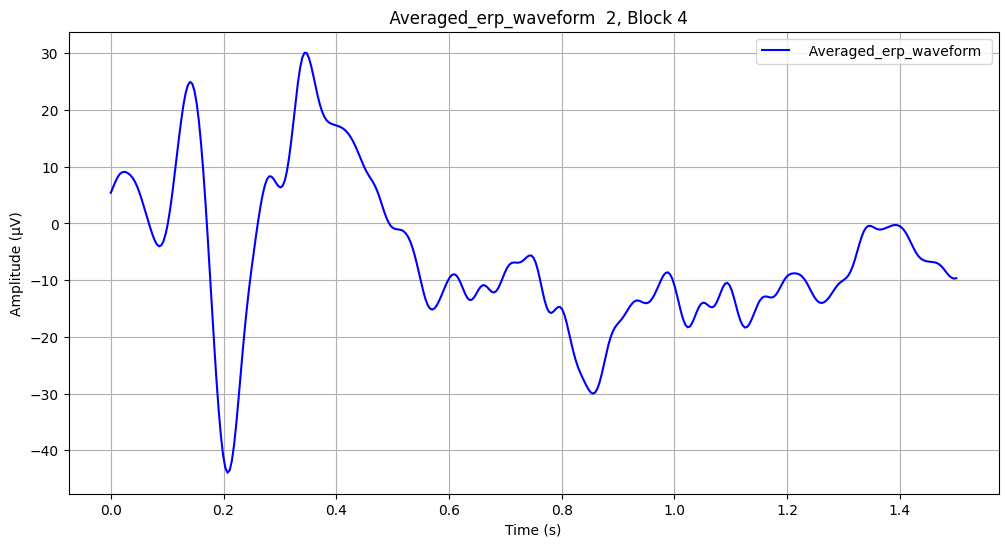

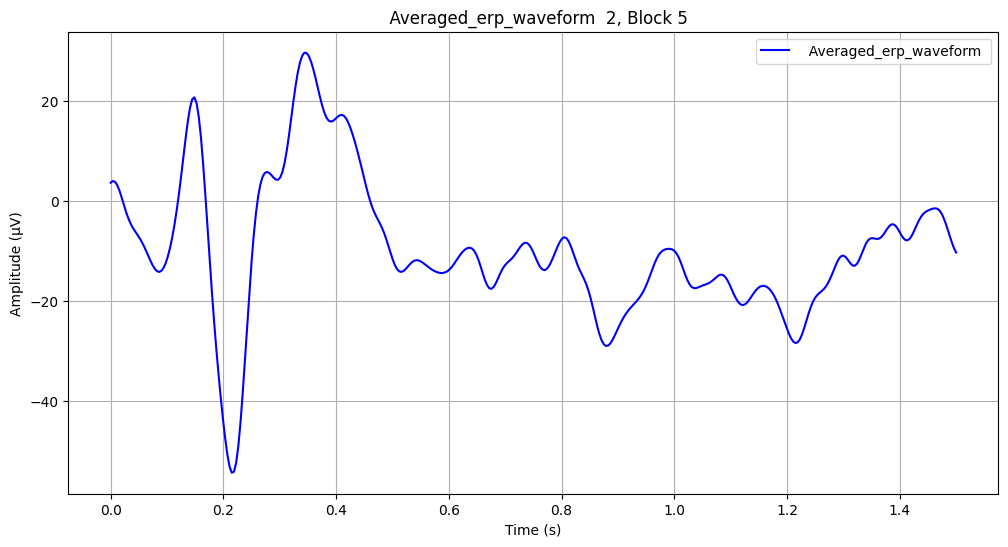

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID
participant_id = 2
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# P300-relevant channels → 0-based indices
channel_map = {
    "P7": 23, "P8": 49, "C3": 7, "C4": 33
}
selected_channels = list(channel_map.keys())  # ["P7", "P8", "C3", "C4"]
selected_indices = list(channel_map.values())  # [23, 49, 7, 33]

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals for selected channels
def plot_p300_erps_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Compute the average ERP across selected channels
        Averaged_erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)

        # Plot the averaged ERP signal
        plt.figure(figsize=(12, 6))
        plt.plot(time,   Averaged_erp_waveform , label="  Averaged_erp_waveform ", color='b')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'  Averaged_erp_waveform  {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot P300 ERPs for all blocks
plot_p300_erps_for_participant(erp_files, participant_id)


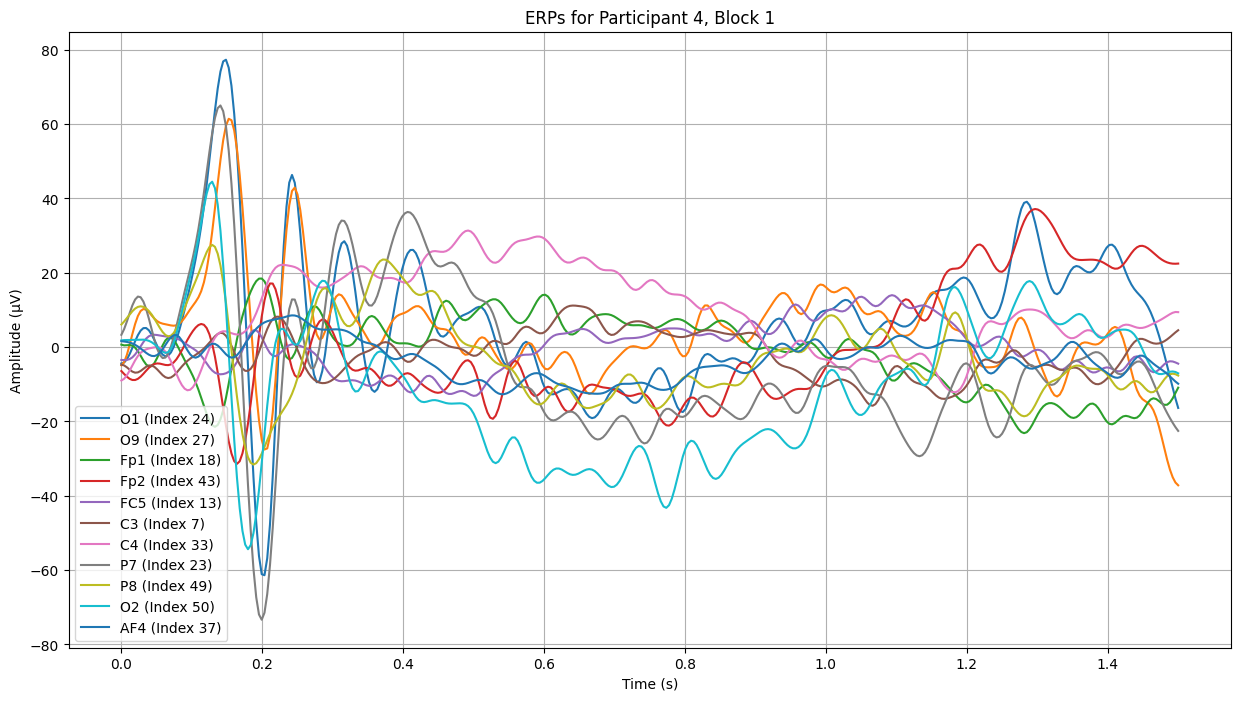

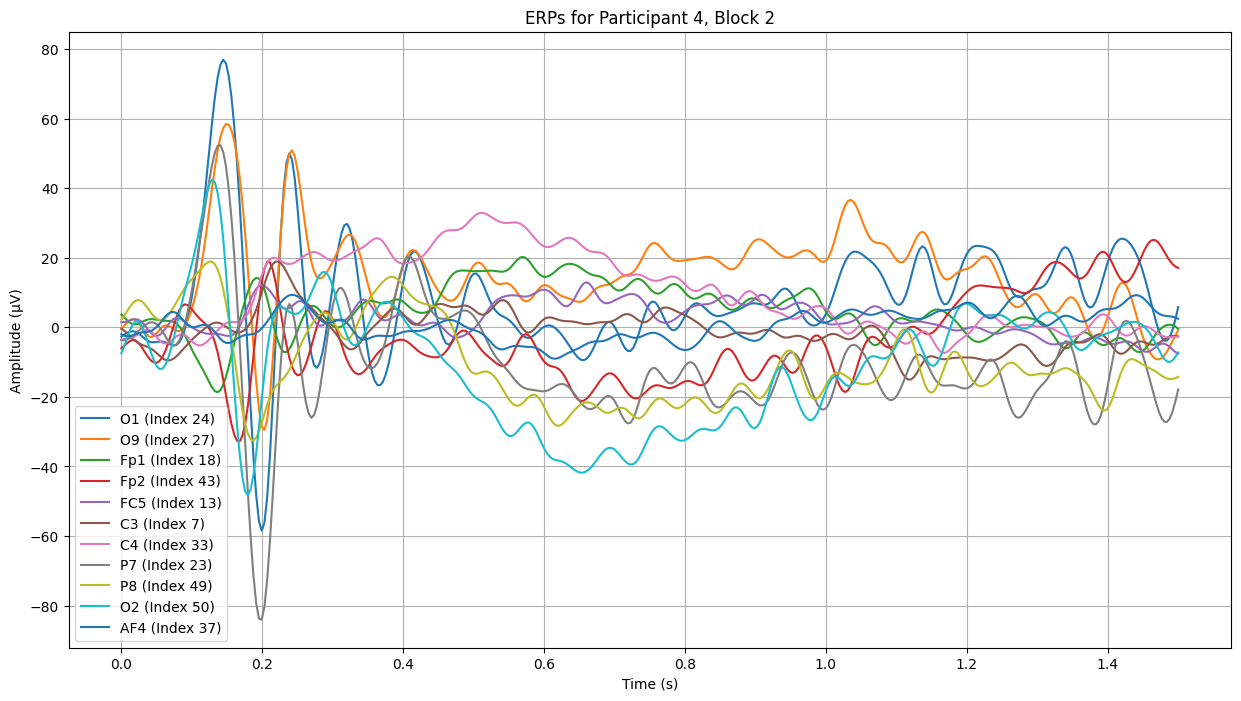

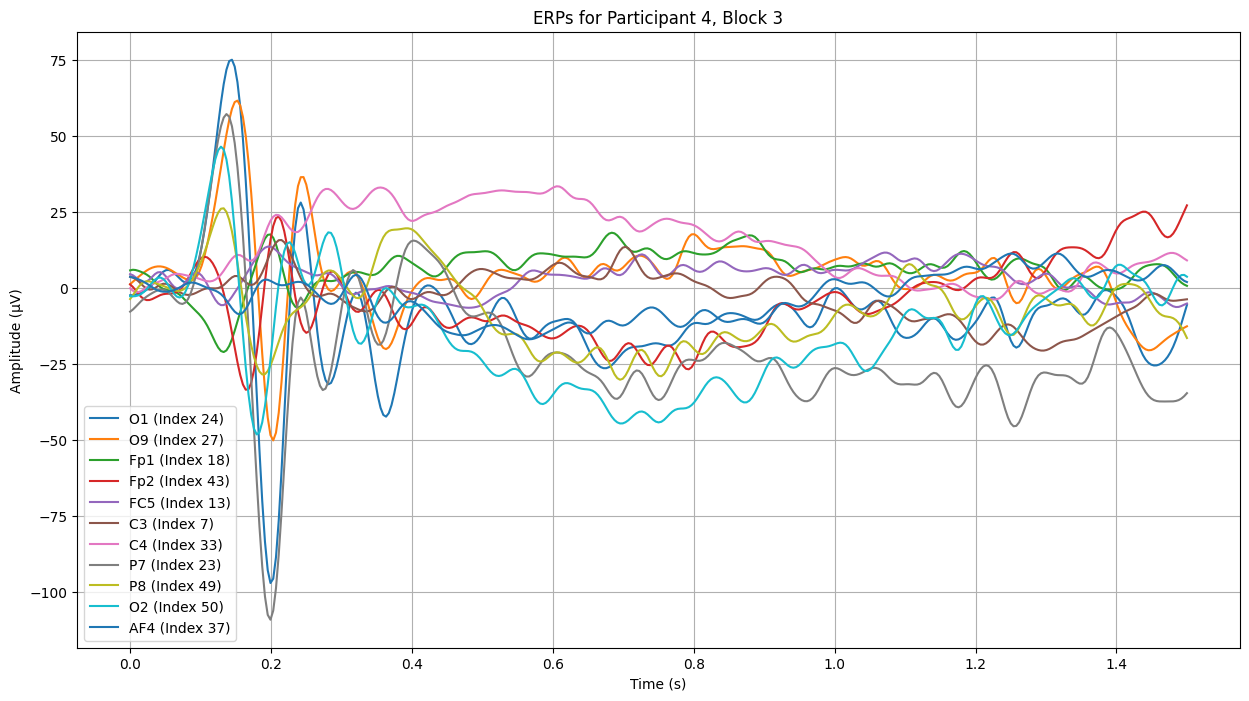

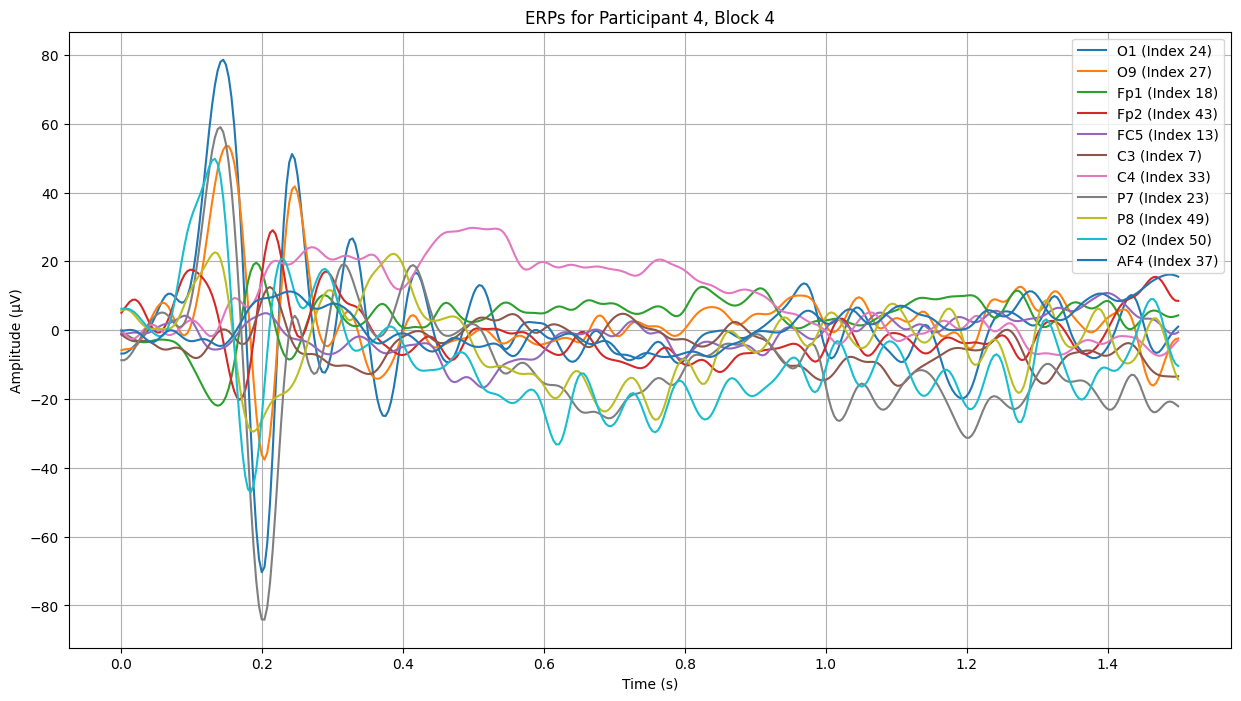

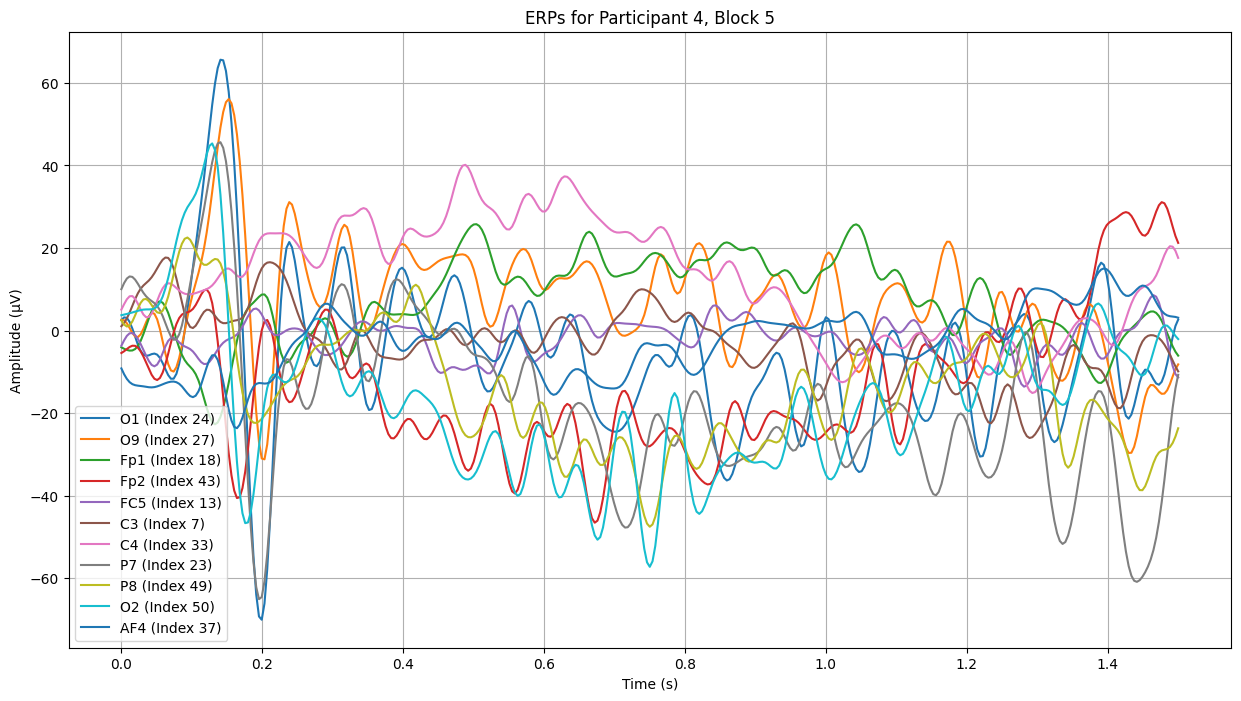

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import os
import glob

# Define the participant ID
participant_id = 4
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# Channel name → 0-based index
channel_map = {
    "O1": 24, "O9": 27, "Fp1": 18, "Fp2": 43, "FC5": 13,
    "C3": 7, "C4": 33, "P7": 23, "P8": 49, "O2": 50, "AF4": 37
}

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals
def plot_erps_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Plot settings
        plt.figure(figsize=(15, 8))
        for ch_name, ch_idx in channel_map.items():
            plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot all ERP blocks for the participant
plot_erps_for_participant(erp_files, participant_id)


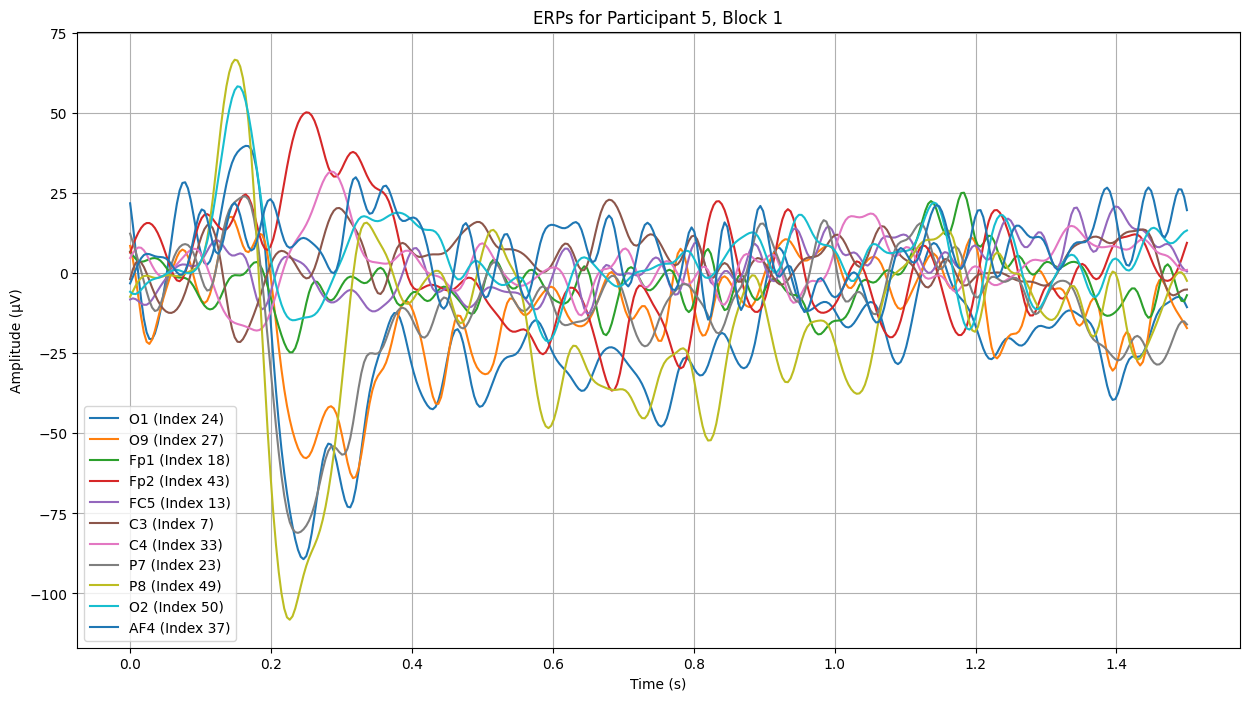

In [ ]:
# Channel name → 0-based index (directly from your data)
channel_map = {
    "O1": 24,
    "O9": 27,
    "Fp1": 18,
    "Fp2": 43,
    "FC5": 13,  # From your data dump: FC5 is at index 13
    "C3": 7,
    "C4": 33,   # From your data dump: C4 is at index 33
    "P7": 23,
    "P8": 49,   # From your data dump: P8 is at index 49
    "O2": 50,   # From your data dump: O2 is at index 50
    "AF4": 37   # From your data dump: AF4 is at index 37
}
import matplotlib.pyplot as plt
import numpy as np

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

def plot_erps(participant_id, block_id):
    # Load ERP data
    erp_file = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}.0_block_{block_id}.mat'
    erp_data = sio.loadmat(erp_file)
    average_signal = erp_data['average_signal']  # Shape: (56, 385)

    # Plot settings
    plt.figure(figsize=(15, 8))
    for ch_name, ch_idx in channel_map.items():
        plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_erps(participant_id=5, block_id=1)

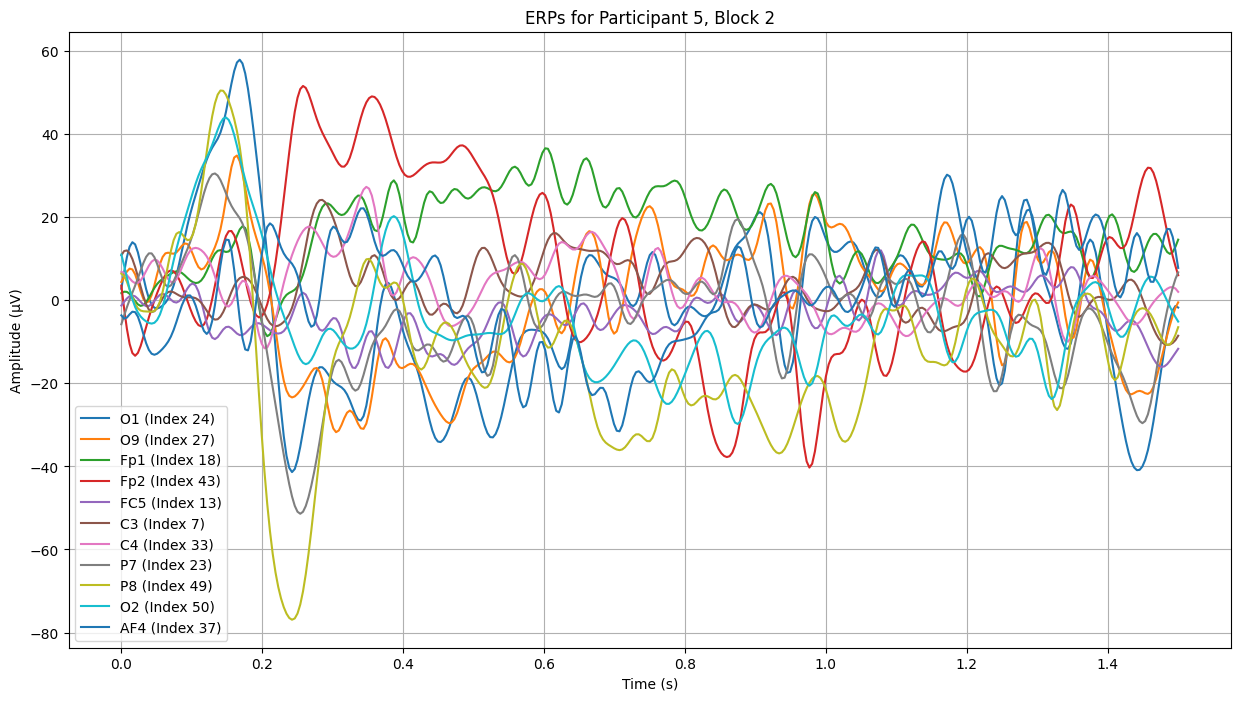

In [ ]:
# Channel name → 0-based index (directly from your data)
channel_map = {
    "O1": 24,
    "O9": 27,
    "Fp1": 18,
    "Fp2": 43,
    "FC5": 13,  # From your data dump: FC5 is at index 13
    "C3": 7,
    "C4": 33,   # From your data dump: C4 is at index 33
    "P7": 23,
    "P8": 49,   # From your data dump: P8 is at index 49
    "O2": 50,   # From your data dump: O2 is at index 50
    "AF4": 37   # From your data dump: AF4 is at index 37
}
import matplotlib.pyplot as plt
import numpy as np

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

def plot_erps(participant_id, block_id):
    # Load ERP data
    erp_file = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}.0_block_{block_id}.mat'
    erp_data = sio.loadmat(erp_file)
    average_signal = erp_data['average_signal']  # Shape: (56, 385)

    # Plot settings
    plt.figure(figsize=(15, 8))
    for ch_name, ch_idx in channel_map.items():
        plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_erps(participant_id=5, block_id=2)

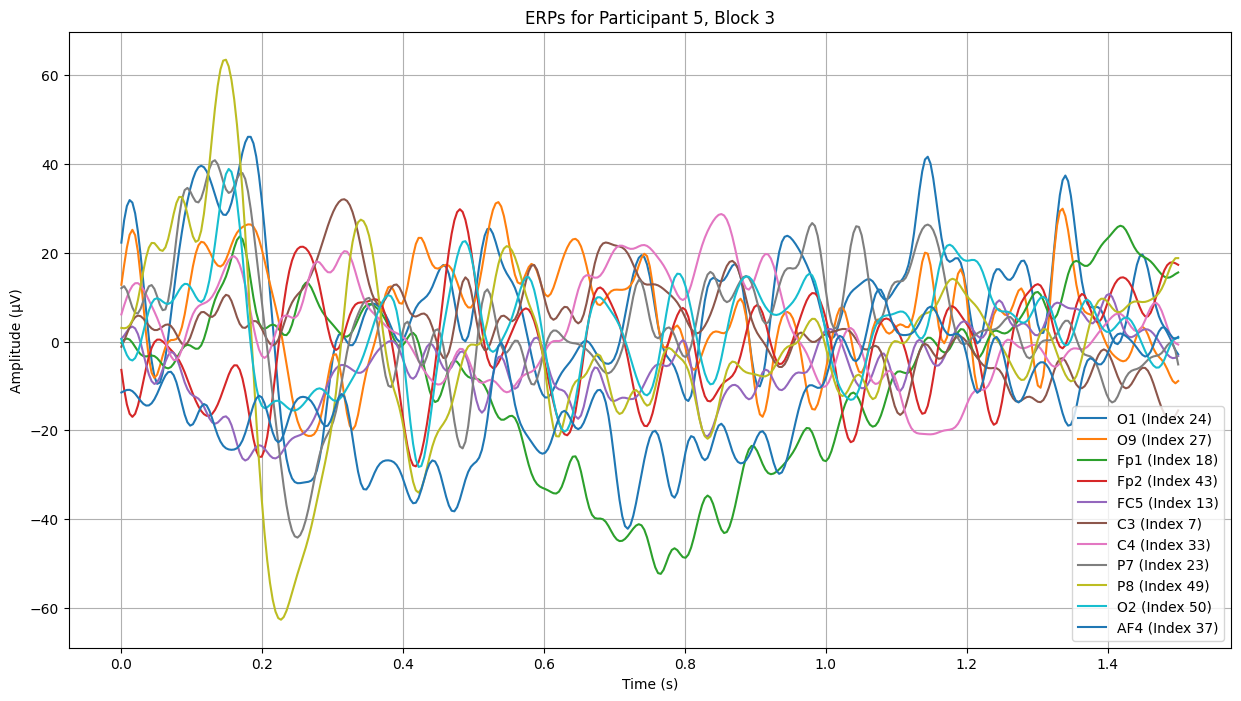

In [ ]:
# Channel name → 0-based index (directly from your data)
channel_map = {
    "O1": 24,
    "O9": 27,
    "Fp1": 18,
    "Fp2": 43,
    "FC5": 13,  # From your data dump: FC5 is at index 13
    "C3": 7,
    "C4": 33,   # From your data dump: C4 is at index 33
    "P7": 23,
    "P8": 49,   # From your data dump: P8 is at index 49
    "O2": 50,   # From your data dump: O2 is at index 50
    "AF4": 37   # From your data dump: AF4 is at index 37
}
import matplotlib.pyplot as plt
import numpy as np

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

def plot_erps(participant_id, block_id):
    # Load ERP data
    erp_file = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}.0_block_{block_id}.mat'
    erp_data = sio.loadmat(erp_file)
    average_signal = erp_data['average_signal']  # Shape: (56, 385)

    # Plot settings
    plt.figure(figsize=(15, 8))
    for ch_name, ch_idx in channel_map.items():
        plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_erps(participant_id=5, block_id=3)

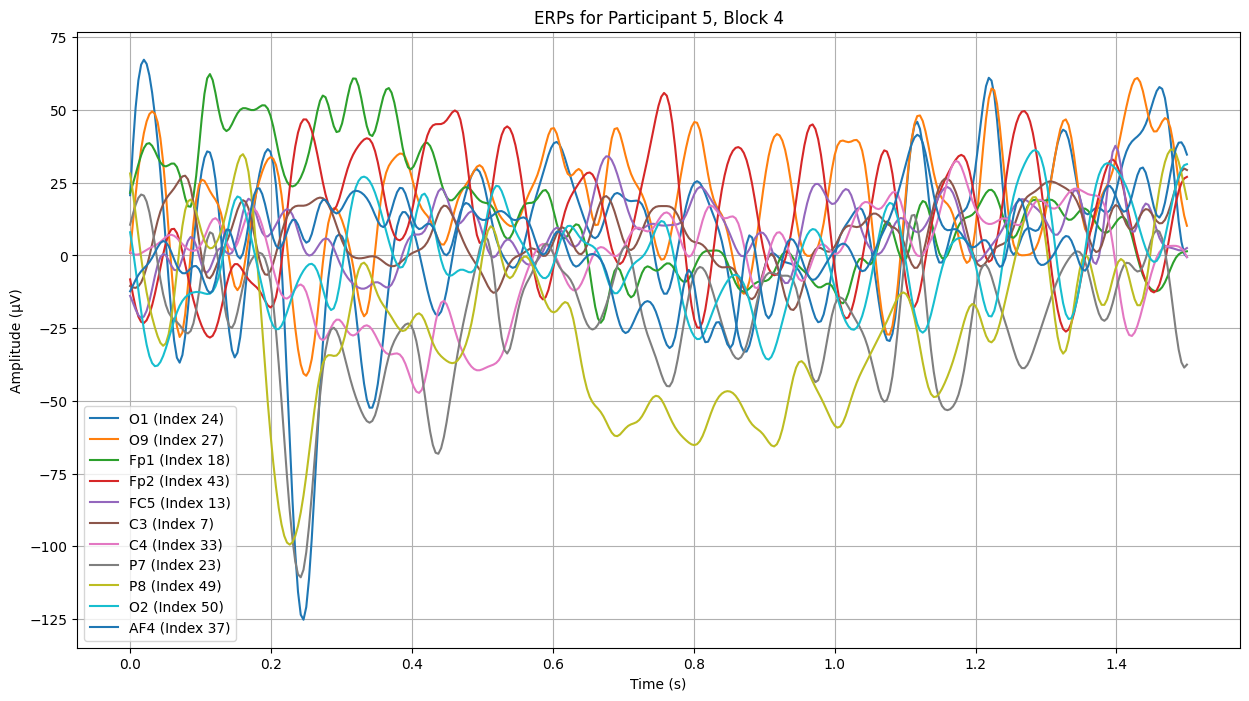

In [ ]:
# Channel name → 0-based index (directly from your data)
channel_map = {
    "O1": 24,
    "O9": 27,
    "Fp1": 18,
    "Fp2": 43,
    "FC5": 13,  # From your data dump: FC5 is at index 13
    "C3": 7,
    "C4": 33,   # From your data dump: C4 is at index 33
    "P7": 23,
    "P8": 49,   # From your data dump: P8 is at index 49
    "O2": 50,   # From your data dump: O2 is at index 50
    "AF4": 37   # From your data dump: AF4 is at index 37
}
import matplotlib.pyplot as plt
import numpy as np

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

def plot_erps(participant_id, block_id):
    # Load ERP data
    erp_file = f'/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_{participant_id}.0_block_{block_id}.mat'
    erp_data = sio.loadmat(erp_file)
    average_signal = erp_data['average_signal']  # Shape: (56, 385)

    # Plot settings
    plt.figure(figsize=(15, 8))
    for ch_name, ch_idx in channel_map.items():
        plt.plot(time, average_signal[ch_idx, :], label=f'{ch_name} (Index {ch_idx})')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERPs for Participant {participant_id}, Block {block_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_erps(participant_id=5, block_id=4)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/average_signal_participant_5_block_5.mat'

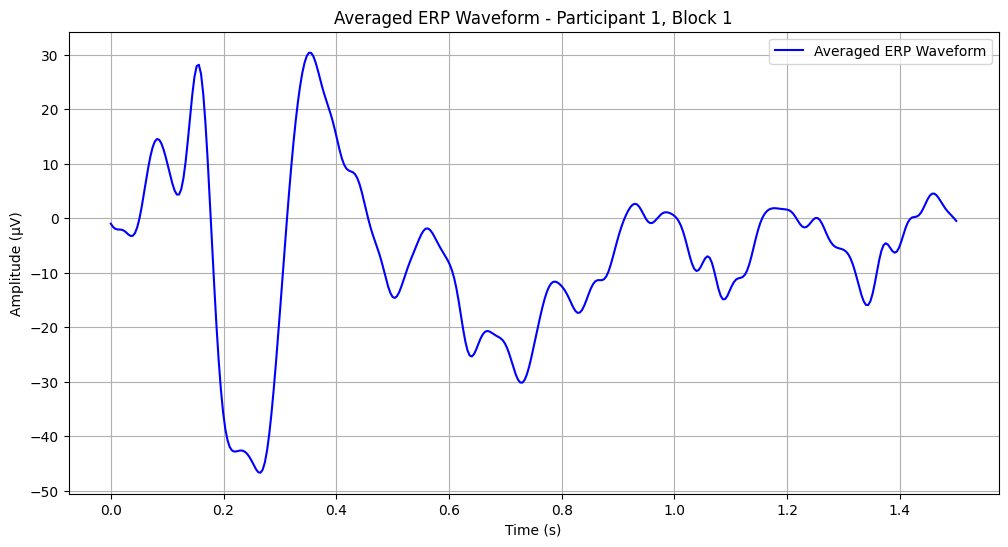

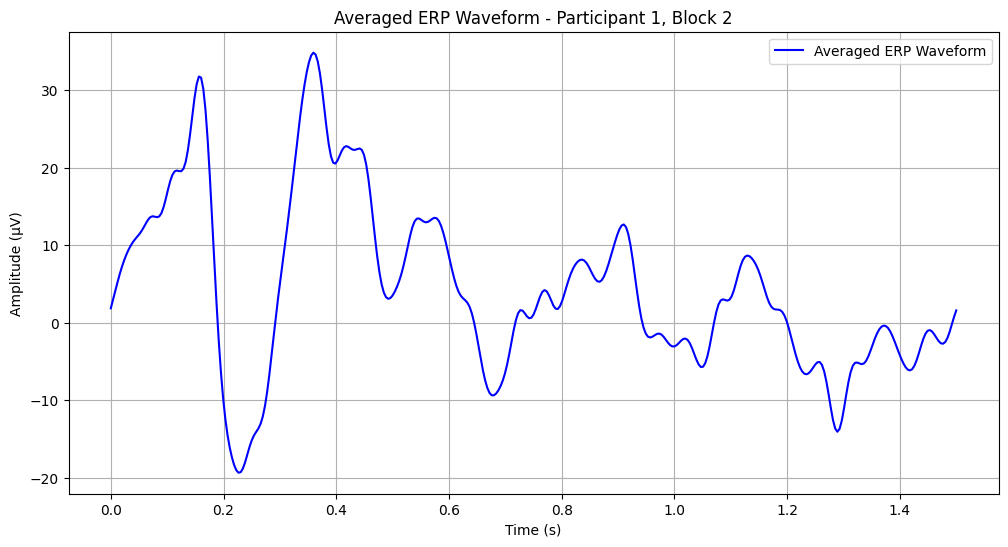

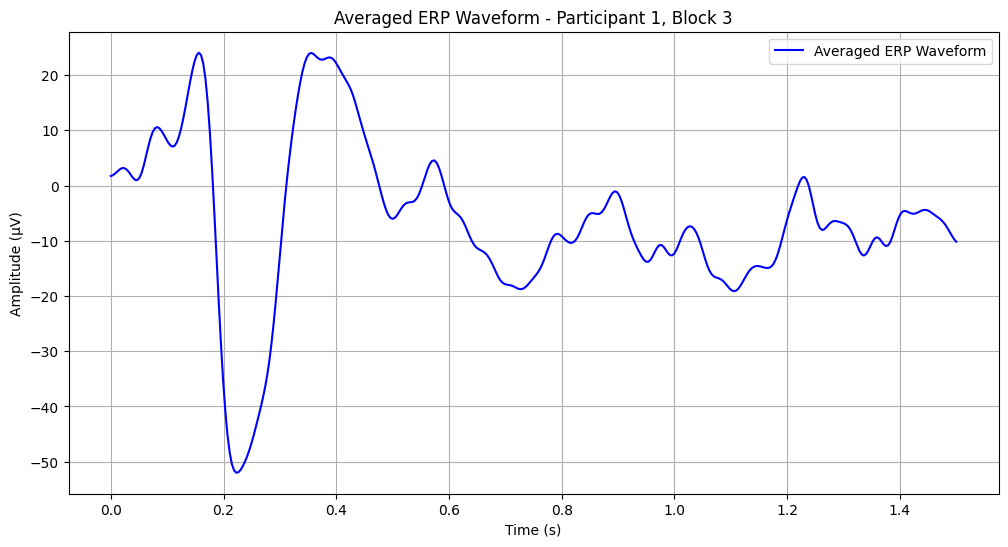

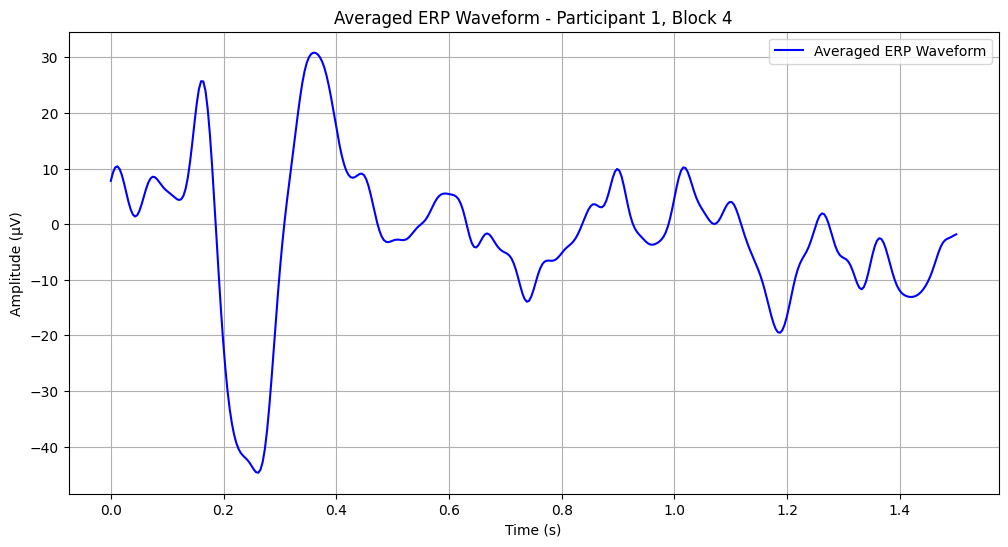

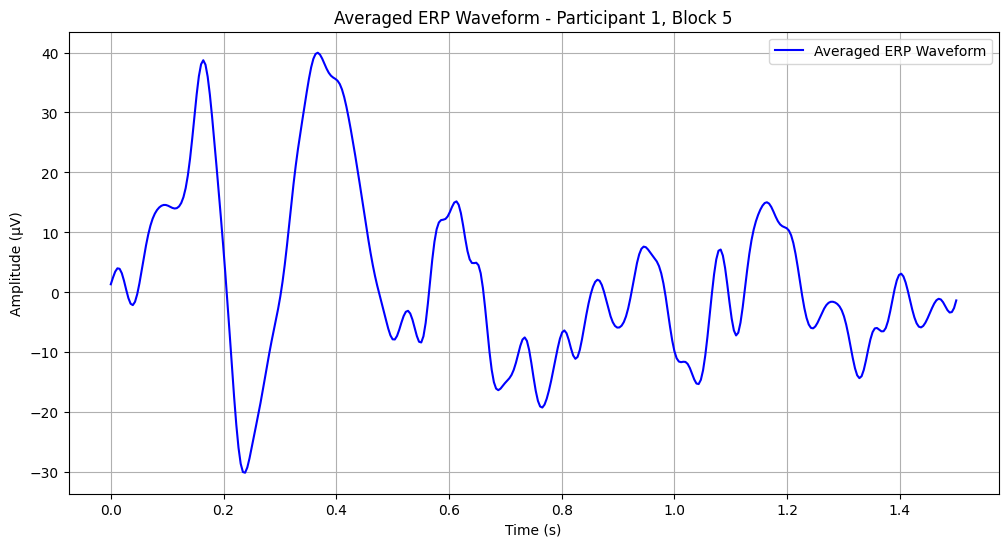

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID
participant_id = 1
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# P300-relevant channels → 0-based indices
channel_map = {
    "P7": 23, "P8": 49, "C3": 7, "C4": 33
}
selected_channels = list(channel_map.keys())  # ["P7", "P8", "C3", "C4"]
selected_indices = list(channel_map.values())  # [23, 49, 7, 33]

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals for selected channels
def plot_average_erp_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Compute the average ERP across selected channels
        Averaged_erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)

        # Plot the averaged ERP signal
        plt.figure(figsize=(12, 6))
        plt.plot(time, Averaged_erp_waveform, label="Averaged ERP Waveform", color='b')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'Averaged ERP Waveform - Participant {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot average ERPs for all blocks
plot_average_erp_for_participant(erp_files, participant_id)


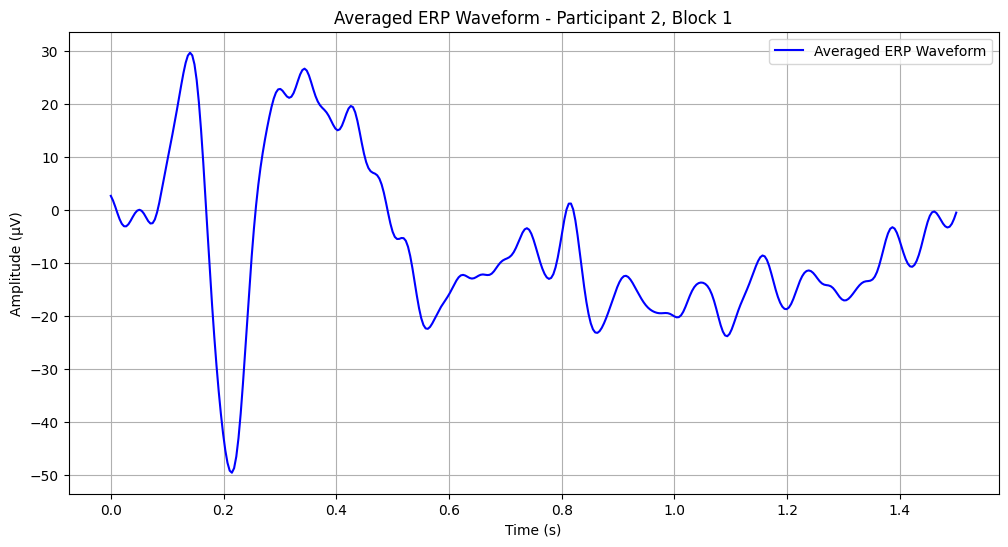

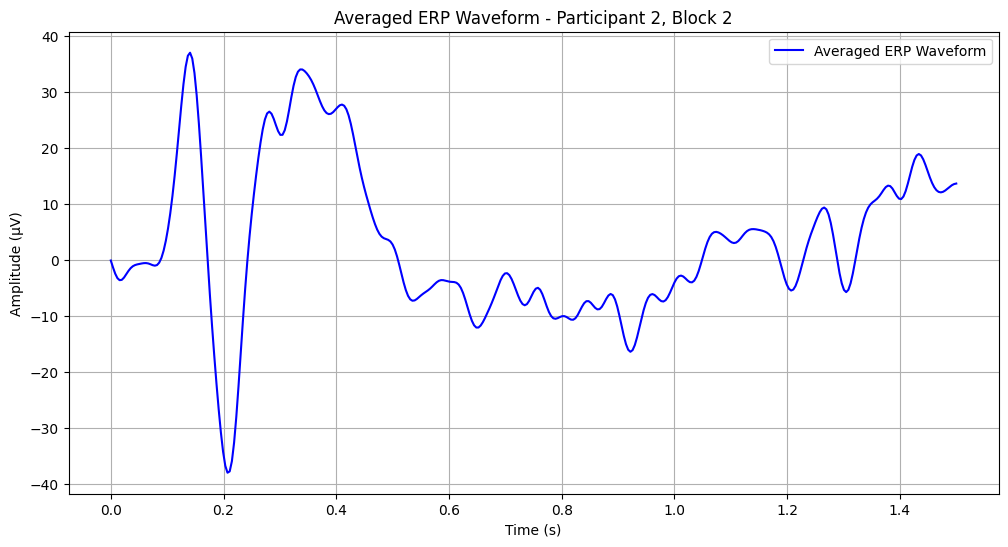

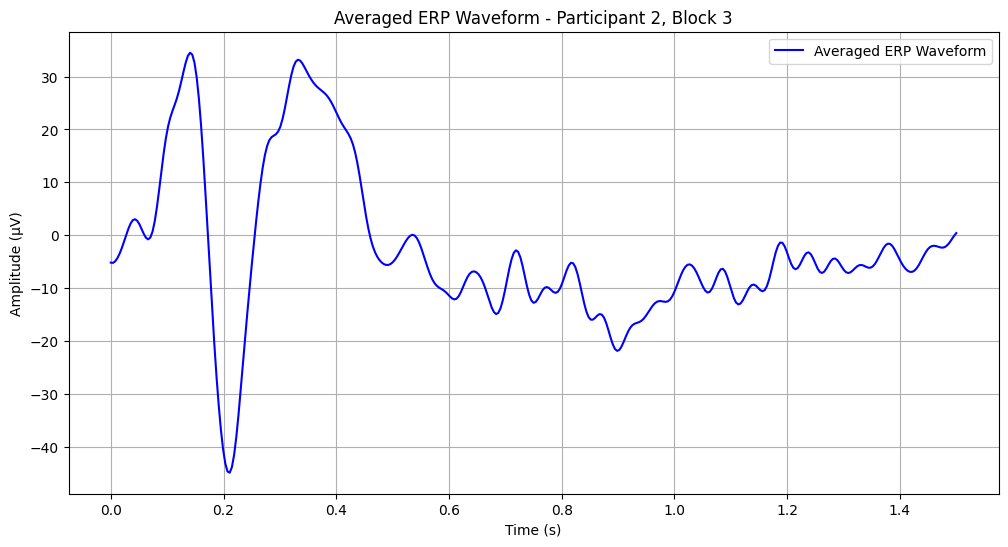

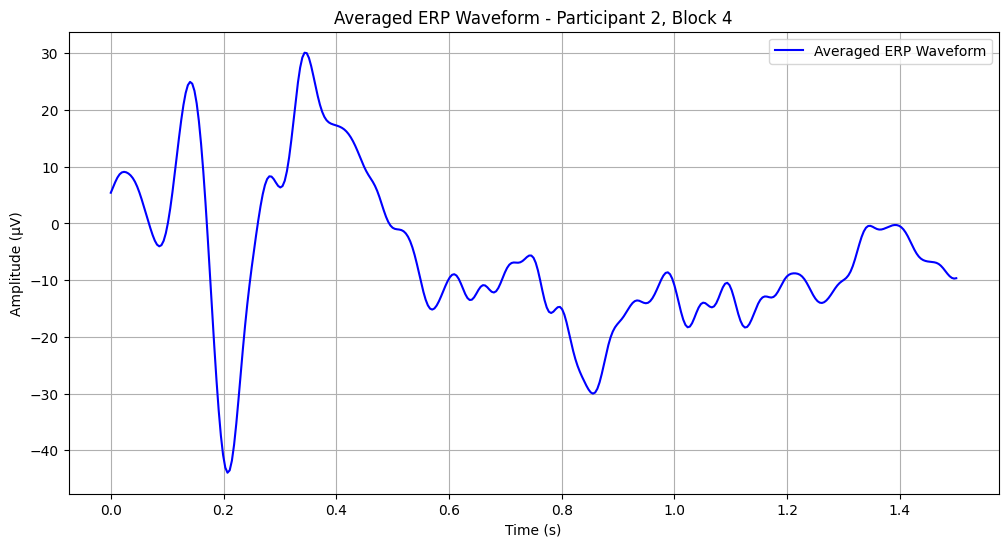

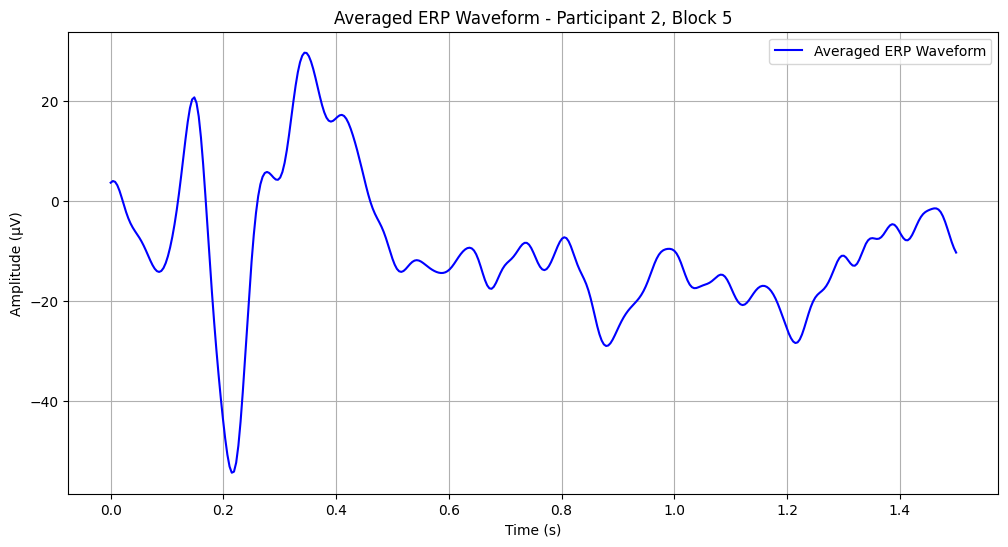

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID
participant_id = 2
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# P300-relevant channels → 0-based indices
channel_map = {
    "P7": 23, "P8": 49, "C3": 7, "C4": 33
}
selected_channels = list(channel_map.keys())  # ["P7", "P8", "C3", "C4"]
selected_indices = list(channel_map.values())  # [23, 49, 7, 33]

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals for selected channels
def plot_average_erp_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Compute the average ERP across selected channels
        Averaged_erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)

        # Plot the averaged ERP signal
        plt.figure(figsize=(12, 6))
        plt.plot(time, Averaged_erp_waveform, label="Averaged ERP Waveform", color='b')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'Averaged ERP Waveform - Participant {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot average ERPs for all blocks
plot_average_erp_for_participant(erp_files, participant_id)


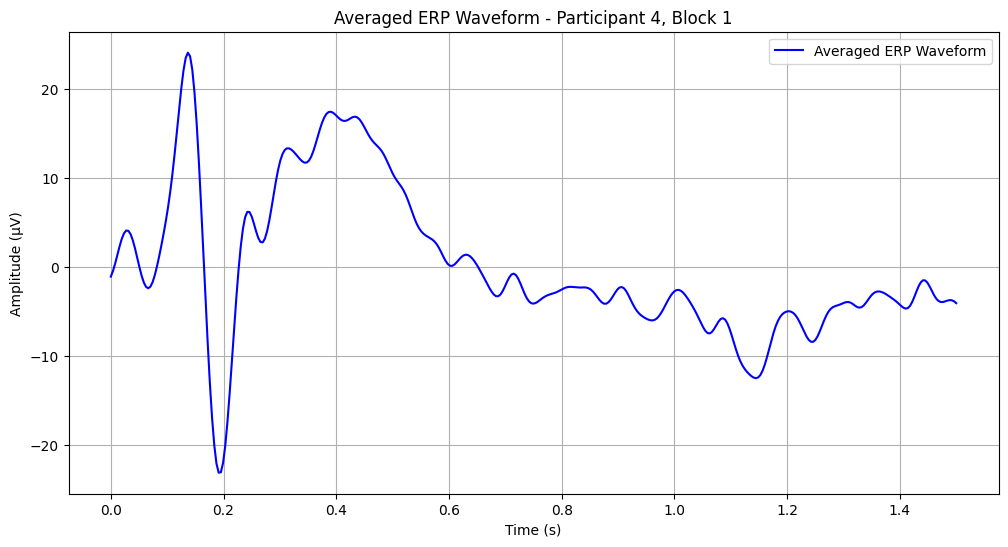

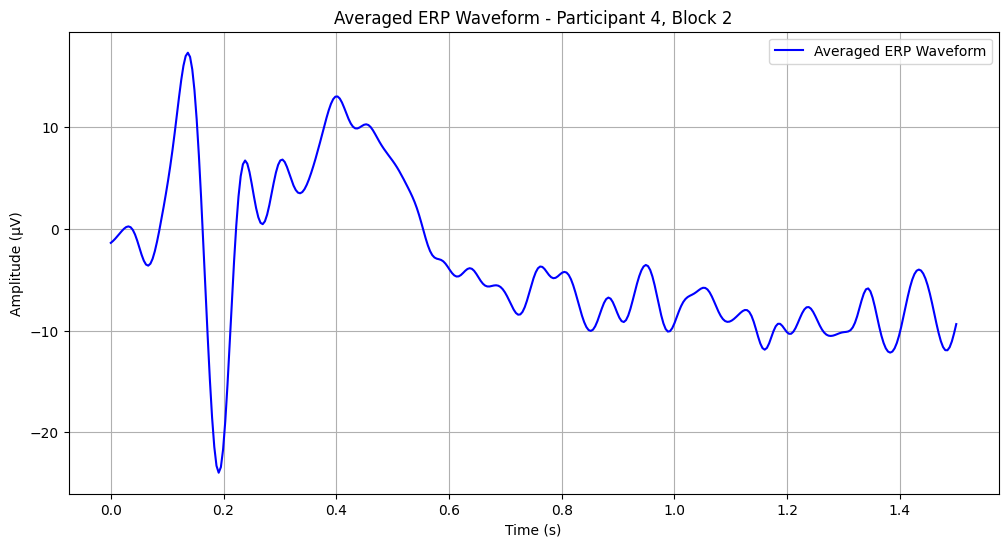

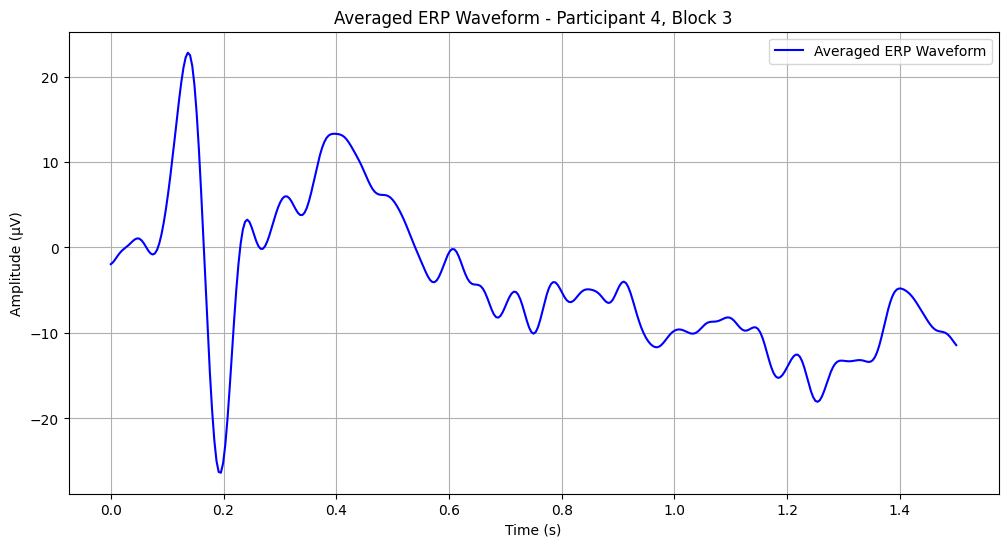

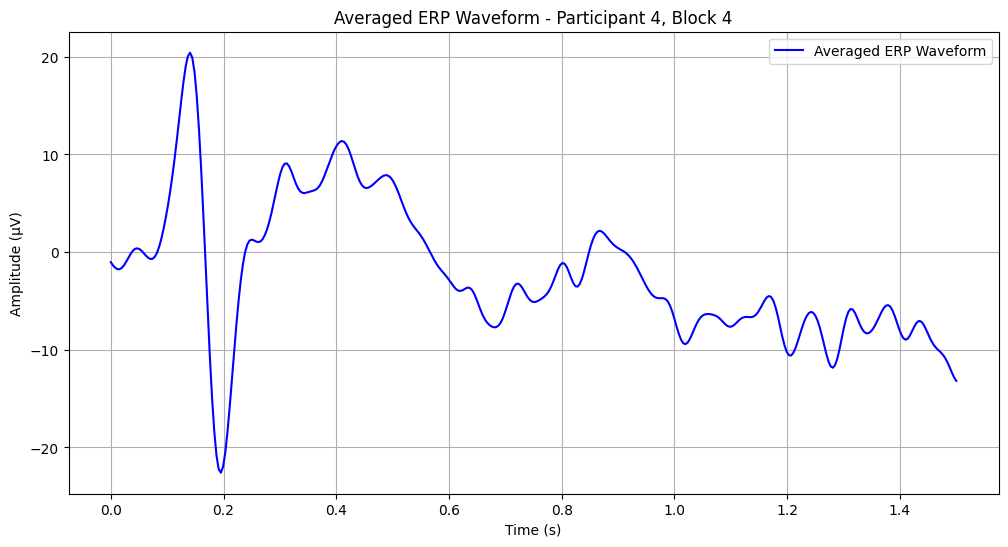

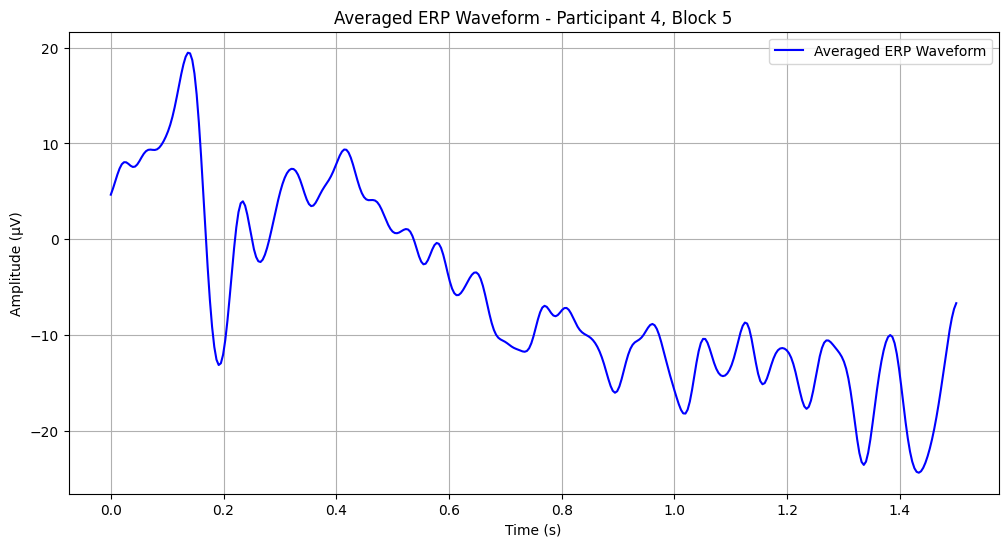

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import glob

# Define the participant ID
participant_id = 4
erp_directory = "/content/drive/MyDrive/EEG_dataset/ADHD_ERP_BLOCKS_1/"

# P300-relevant channels → 0-based indices
channel_map = {
    "P7": 23, "P8": 49, "C3": 7, "C4": 33
}
selected_channels = list(channel_map.keys())  # ["P7", "P8", "C3", "C4"]
selected_indices = list(channel_map.values())  # [23, 49, 7, 33]

# Time axis (385 samples at 256 Hz)
sampling_rate = 256
time = np.arange(385) / sampling_rate  # 0 to ~1.5 seconds

# Find all ERP files for the given participant
erp_files = sorted(glob.glob(f"{erp_directory}/average_signal_participant_{participant_id}.0_block_*.mat"))

# Function to plot ERP signals for selected channels
def plot_average_erp_for_participant(erp_files, participant_id):
    for erp_file in erp_files:
        # Extract block number from file name
        block_id = int(erp_file.split("_block_")[-1].split(".mat")[0])  # Extract block number

        # Load ERP data
        erp_data = sio.loadmat(erp_file)
        average_signal = erp_data['average_signal']  # Shape: (56, 385)

        # Compute the average ERP across selected channels
        Averaged_erp_waveform = np.mean(average_signal[selected_indices, :], axis=0)

        # Plot the averaged ERP signal
        plt.figure(figsize=(12, 6))
        plt.plot(time, Averaged_erp_waveform, label="Averaged ERP Waveform", color='b')

        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (µV)')
        plt.title(f'Averaged ERP Waveform - Participant {participant_id}, Block {block_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot average ERPs for all blocks
plot_average_erp_for_participant(erp_files, participant_id)


In [ ]:
#Noise Calculation:
# In your code, you're calculating the noise as the standard deviation of the trials along the third axis (which corresponds to the trials themselves):

# python
# Copy
# Edit
# # Calculate the noise (standard deviation across trials)
# noise = np.std(block_trials, axis=2)
# Here, block_trials has the shape (56, 385, N), where:

# 56 is the number of channels,
# 385 is the number of time points, and
# N is the number of trials in the block.
# What Happens in np.std(block_trials, axis=2)?
# When you calculate the standard deviation along axis=2, you are calculating the standard deviation of the signal across the trials for each channel and each time point. This gives you a measure of the variation (noise) at each channel and time point across the trials.

# Thus, after computing the standard deviation over trials (axis 2), the resulting noise array will have the shape (56, 385):

# 56 channels (one value of noise per channel),
# 385 time points (one value of noise per time point).
# So, the noise array shape (56, 385) represents the standard deviation of the trials for each channel at each time point.

# What This Means in Your Code:
# Noise (standard deviation) for each channel and each time point is calculated across all trials. That’s why we get an array with 56 rows (channels) and 385 columns (timepoints).
# This noise array must match the shape of the average_signal, which is also (56, 385) after transposition, so that you can calculate the Signal-to-Noise Ratio (SNR) by dividing them element-wise.
# Recap:
# The shape of noise after calculating the standard deviation over trials is (56, 385) (channels × timepoints).
# This is why you need to transpose it to match the shape of average_signal (also (56, 385) after you transpose it from (385, 56)).

In [ ]:
#finding the snr to decide the optimal number of trials for a block
#60 is the optimal number of trials for a block
import numpy as np
import scipy.io as sio

# File paths
ystim_file_path = '/content/drive/MyDrive/EEG_dataset/y_stim_subset_23161_to_33902.mat'
combined_eeg_file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_Files_combined.mat'

# Load y_stim subset
ystim_data = sio.loadmat(ystim_file_path)['y_stim_subset_23161_to_33902']
participants = ystim_data[0, :]  # Extract participant IDs

# Load combined EEG data
combined_data = sio.loadmat(combined_eeg_file_path)['combined_data']  # Shape: (385, 56, trials)

# Step 1: Calculate the number of trials per participant
unique_participants, trial_counts = np.unique(participants, return_counts=True)
participant_trial_mapping = dict(zip(unique_participants, trial_counts))

# Block sizes to test
block_sizes_to_test = [30, 40, 50, 60]

# Dictionary to store SNR for each block size
block_size_snr = {block_size: [] for block_size in block_sizes_to_test}

# Step 2: Process each participant's trials for different block sizes
start_index = 0  # Initialize trial index
for block_size in block_sizes_to_test:
    for participant_id in unique_participants:
        num_trials = participant_trial_mapping[participant_id]
        participant_trials = combined_data[:, :, start_index:start_index + num_trials]  # Extract trials for participant

        # Determine how many blocks fit with the given block size
        num_full_blocks = num_trials // block_size
        remaining_trials = num_trials % block_size

        trial_blocks = []
        for i in range(num_full_blocks):
            trial_blocks.append(participant_trials[:, :, i * block_size:(i + 1) * block_size])

        if remaining_trials > 0:
            trial_blocks.append(participant_trials[:, :, num_full_blocks * block_size:])

        # Step 3: Calculate ERP and SNR for each block
        for block_idx, block_trials in enumerate(trial_blocks):
            # Calculate the ERP (average signal over trials)
            average_signal = np.mean(block_trials, axis=2)
            average_signal = average_signal.T  # Shape: (channels, timepoints)

            # Calculate the noise (standard deviation across trials)
            noise = np.std(block_trials, axis=2)
            noise = noise.T  # Transpose noise to match the shape of average_signal

            # Calculate SNR (signal divided by noise)
            snr = average_signal / noise

            # Store the SNR for this block size
            block_size_snr[block_size].append(np.mean(snr))  # Average SNR for this block size

            # Print results for each block size and participant
            print(f"Block Size: {block_size}, Participant: {participant_id}, Block: {block_idx + 1}, Average SNR: {np.mean(snr)}")

# Print the stored SNR values for each block size
for block_size, snr_values in block_size_snr.items():
    print(f"\nBlock Size {block_size}: Average SNR across participants: {np.mean(snr_values)}")


Block Size: 30, Participant: 1.0, Block: 1, Average SNR: 0.005675123538821936
Block Size: 30, Participant: 1.0, Block: 2, Average SNR: -0.010671191848814487
Block Size: 30, Participant: 1.0, Block: 3, Average SNR: 0.01414687093347311
Block Size: 30, Participant: 1.0, Block: 4, Average SNR: 0.010256094858050346
Block Size: 30, Participant: 1.0, Block: 5, Average SNR: 0.008262650109827518
Block Size: 30, Participant: 1.0, Block: 6, Average SNR: 0.011457642540335655
Block Size: 30, Participant: 1.0, Block: 7, Average SNR: 0.006774554029107094
Block Size: 30, Participant: 1.0, Block: 8, Average SNR: -0.00208027265034616
Block Size: 30, Participant: 1.0, Block: 9, Average SNR: 0.008768301457166672
Block Size: 30, Participant: 2.0, Block: 1, Average SNR: 0.005675123538821936
Block Size: 30, Participant: 2.0, Block: 2, Average SNR: -0.010671191848814487
Block Size: 30, Participant: 2.0, Block: 3, Average SNR: 0.01414687093347311
Block Size: 30, Participant: 2.0, Block: 4, Average SNR: 0.01025

<ipython-input-46-66bfd3289d45>:56: RuntimeWarning: divide by zero encountered in divide
  snr = average_signal / noise
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Block Size: 50, Participant: 39.0, Block: 4, Average SNR: 0.014806220307946205
Block Size: 50, Participant: 39.0, Block: 5, Average SNR: -0.0070477742701768875
Block Size: 50, Participant: 39.0, Block: 6, Average SNR: 0.012542277574539185
Block Size: 50, Participant: 40.0, Block: 1, Average SNR: 0.0013508028350770473
Block Size: 50, Participant: 40.0, Block: 2, Average SNR: 0.005758460611104965
Block Size: 50, Participant: 40.0, Block: 3, Average SNR: 0.01027565635740757
Block Size: 50, Participant: 40.0, Block: 4, Average SNR: 0.014806220307946205
Block Size: 50, Participant: 40.0, Block: 5, Average SNR: -0.010352053679525852
Block Size: 50, Participant: 41.0, Block: 1, Average SNR: 0.0013508028350770473
Block Size: 50, Participant: 41.0, Block: 2, Average SNR: 0.005758460611104965
Block Size: 50, Participant: 41.0, Block: 3, Average SNR: 0.010869830846786499
Block Size: 50, Participant: 42.0, Block: 1, Average SNR: 0.0013508028350770473
Block Size: 50, Participant: 42.0, Block: 2, Av